In [16]:
import sys
sys.path.append(r"C:\Users\baptiste.menetrier\Desktop\devPy\phd")

import os 
import numpy as np
from real_data_analysis.fiberscope.fiberscope_utils import *
from publication.PublicationFigure import PubFigure

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter


PubFigure()

# Define usefull filenames that can be processed 

In [17]:
# Distance from P1 in meters for each position
dict_th_pos = {
    "P1": 0,
    "P2": 10,
    "P3": 20,
    "P4": 25,
    "P5": 15,
    "P6": 5,
}

## Sweep 1 : 8 - 15 kHz

In [18]:
recording_names_N1 = [
    "09-10-2024T10-34-58-394627_P1_N1_Sweep_34",
    "09-10-2024T16-51-22-900122_P2_N1_Sweep_93",
    "10-10-2024T09-43-06-620681_P3_N1_Sweep_151",
    "10-10-2024T12-03-02-201689_P4_N1_Sweep_211",
    "10-10-2024T14-42-01-833325_P5_N2_Sweep_267",  # Name N2 but actually N1
    "10-10-2024T15-54-25-737795_P6_N1_Sweep_323",
    # "11-10-2024T10-51-56-563968_P3_N1_Sweep_385",  # P7
    # "11-10-2024T12-08-20-091131_P1_N1_Sweep_437",  # P8
]

recording_names_N3 = [
    "09-10-2024T10-37-04-088817_P1_N3_Sweep_36",
    "09-10-2024T16-53-16-681510_P2_N3_Sweep_95",
    "10-10-2024T09-45-50-516056_P3_N3_Sweep_153",
    "10-10-2024T12-04-46-610661_P4_N3_Sweep_213",
    "10-10-2024T14-43-47-603375_P5_N3_Sweep_269",
    "10-10-2024T15-56-16-837150_P6_N3_Sweep_325",
]

recording_names_N5 = [
    "09-10-2024T10-39-11-308093_P1_N5_Sweep_38",
    "09-10-2024T16-55-08-243011_P2_N5_Sweep_97",
    "10-10-2024T09-47-33-438942_P3_N5_Sweep_155",
    "10-10-2024T12-06-31-200643_P4_N5_Sweep_215",
    "10-10-2024T14-45-21-047719_P5_N5_Sweep_271",
    "10-10-2024T15-57-57-549910_P6_N5_Sweep_327",
]

t_interp_pulse = 1  # Inter sweep period
t_pulse = 100 * 1e-3  # Single sweep duration
t_ir = 1  # Approximated impulse response duration (simple value to ensure no energy is received after this time)
n_sweep = 10  # Number of sweep emitted
f0 = 8e3  # Start frequency
f1 = 15e3  # End frequency

recording_props = {
    "t_interp_pulse": t_interp_pulse,
    "t_pulse": t_pulse,
    "t_ir": t_ir,
    "n_em": n_sweep,
    "f0": f0,
    "f1": f1,
}

processing_props = {
    "hydro_to_process": None,
    "ref_hydro": 1,
    "method": "cs",
    "alpha_th": 0.001 * 1e-2,
    "split_method": "band_energy",
}


sweep_1 = {
    "recording_props": recording_props,
    "processing_props": processing_props,
    "recording_names": {
        "N1": recording_names_N1,
        "N3": recording_names_N3,
        "N5": recording_names_N5,
    }

}

## Sweep 2 :  10 - 13 kHz 

In [19]:
t_interp_pulse = 1  # Inter sweep period
t_pulse = 100 * 1e-3  # Single sweep duration
t_ir = 1  # Approximated impulse response duration (simple value to ensure no energy is received after this time)
n_sweep = 10  # Number of sweep emitted
f0 = 10e3  # Start frequency
f1 = 13e3  # End frequency

recording_props = {
    "t_interp_pulse": t_interp_pulse,
    "t_pulse": t_pulse,
    "t_ir": t_ir,
    "n_em": n_sweep,
    "f0": f0,
    "f1": f1,
}

processing_props = {
    "hydro_to_process": None,
    "ref_hydro": 1,
    "method": "cs",
    "alpha_th": 0.001 * 1e-2,
    "split_method": "band_energy",
}

sweep_2 = {
    "recording_props": recording_props,
    "processing_props": processing_props,
}


## Sweep 3 :  2 - 20 kHz 

In [20]:
t_interp_pulse = 2  # Inter sweep period
t_pulse = 800 * 1e-3  # Single sweep duration
f0 = 2e3  # Start frequency
f1 = 20e3  # End frequency
n_sweep = 10  # Number of sweep emitted
t_ir = 1

recording_props = {
    "t_interp_pulse": t_interp_pulse,
    "t_pulse": t_pulse,
    "t_ir": t_ir,
    "n_em": n_sweep,
    "f0": f0,
    "f1": f1,
}

processing_props = {
    "hydro_to_process": None,
    "ref_hydro": 1,
    "method": "cs",
    "alpha_th": 0.01 * 1e-2,
    "split_method": "band_energy",
}

sweep_3 = {
    "recording_props": recording_props,
    "processing_props": processing_props,
}

# Analyse recordings to build rtf 

In [21]:
# recording_props = sweep_1["recording_props"]
# processing_props = sweep_1["processing_props"]
# # records_to_process = sweep_1["recording_names"]["N1"] + sweep_1["recording_names"]["N3"] + sweep_1["recording_names"]["N5"]
# records_to_process = sweep_1["recording_names"]["N3"]

# for record in records_to_process:
#     run_analysis(
#         record, recording_props, processing_props, plot_rtf_estimation=True, verbose=True
#     )

# Source localisation using static sources library

c:\Users\baptiste.menetrier\.virtualenvs\phd-FBjz4hBd\Lib\site-packages\xarray\namedarray\core.py:264: UserWarning: Duplicate dimension names present: dimensions {'h_index'} appear more than once in dims=('f_csdm', 'h_index', 'h_index'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  self._dims = self._parse_dimensions(dims)
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:1285: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  )
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscop

(['P1', 'P2', 'P3', 'P4', 'P5', 'P6'],
 array([6.17571965e+01, 6.05130052e+01, 2.41311325e-07, 6.07541894e+01,
        5.99196295e+01, 5.94632500e+01]),
 array([32.85229886, 31.74695362, 32.86789586, 34.3093477 , 27.99306584]),
 {'mean_dist': {'blank': array([0.55915993, 0.23955985, 0.90561845, 0.1503355 , 0.18491103,
          0.25715575]),
   'scot': array([0.49609534, 0.53879441, 1.        , 0.58811201, 0.6013347 ,
          0.61018748]),
   'phat': array([0.46920707, 0.51637886, 1.        , 0.54214964, 0.53141461,
          0.52068736]),
   'ml': array([0.04980593, 0.07116574, 1.        , 0.58467264, 0.5996633 ,
          0.56004157])},
  'blank': array([[1.        , 0.5856726 , 0.41780222, 0.02153159, 0.77079322],
         [0.56631593, 0.17760773, 0.19197561, 0.09590619, 0.1659938 ],
         [0.52809224, 1.        , 1.        , 1.        , 1.        ],
         [0.35153744, 0.05618406, 0.06372158, 0.12097411, 0.1592603 ],
         [0.45785493, 0.0799873 , 0.2885501 , 0.07994455, 

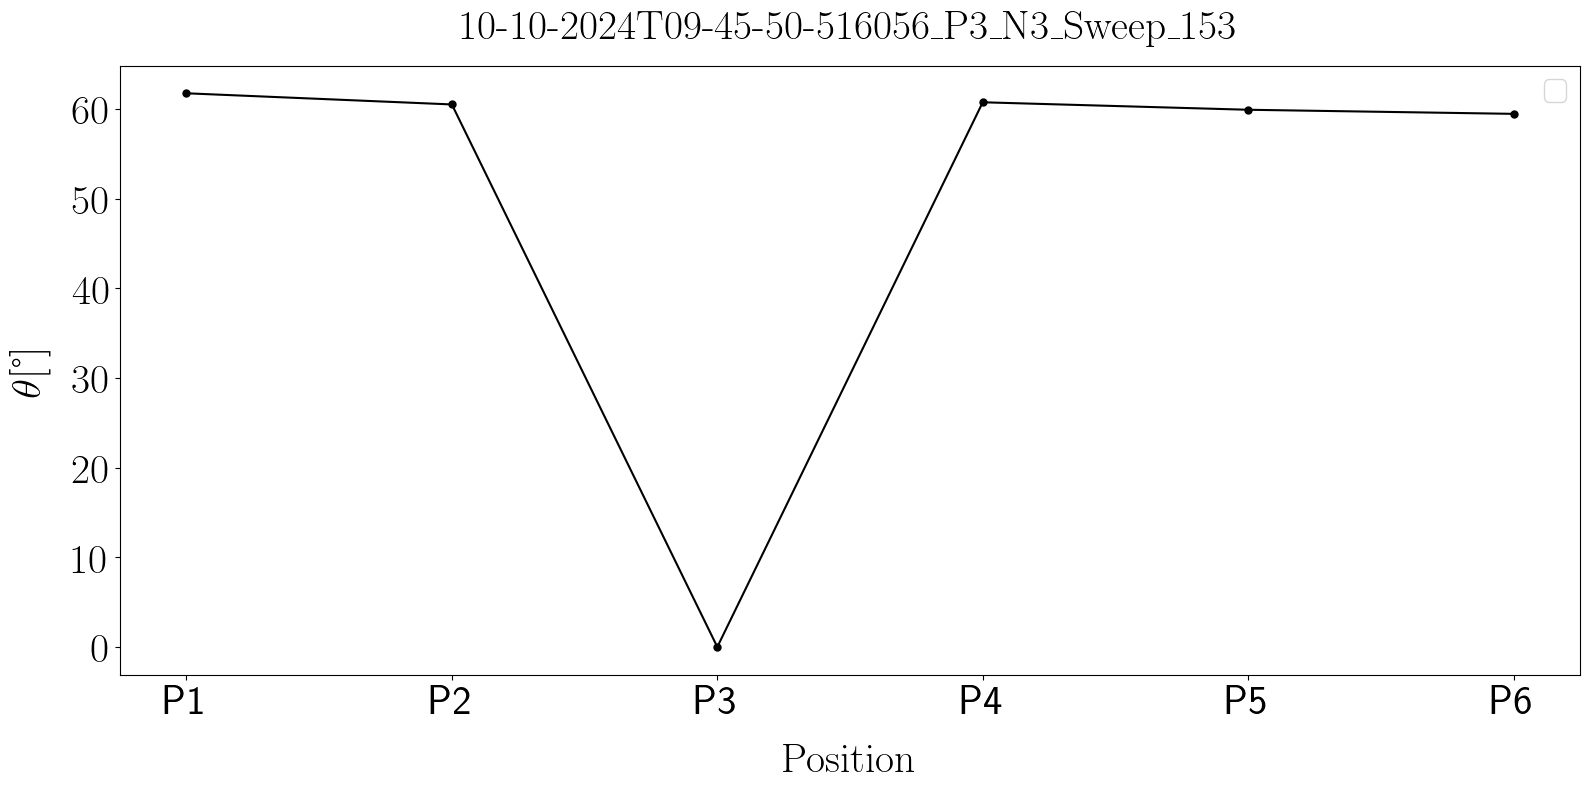

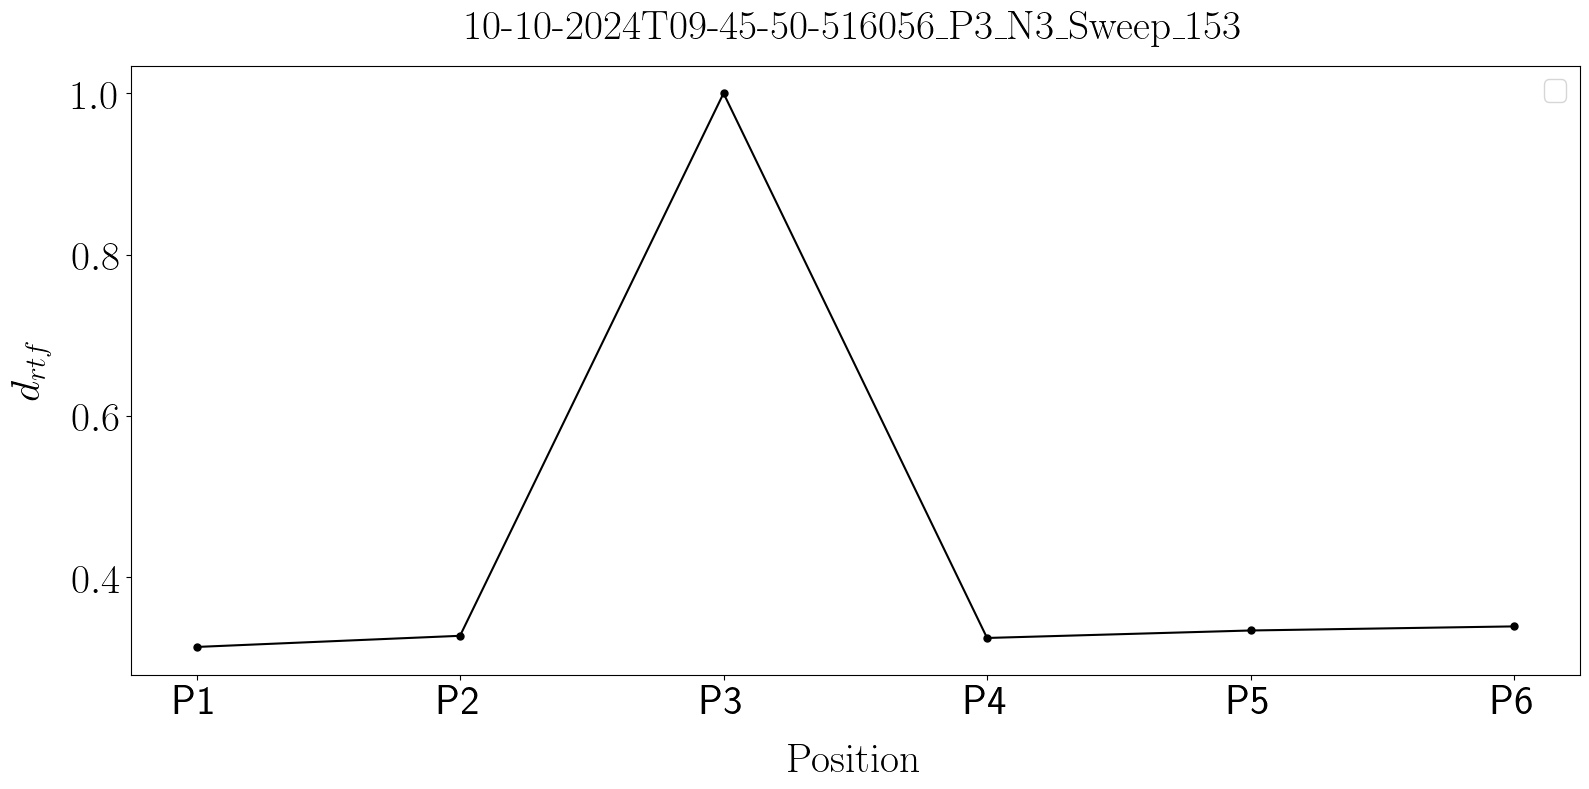

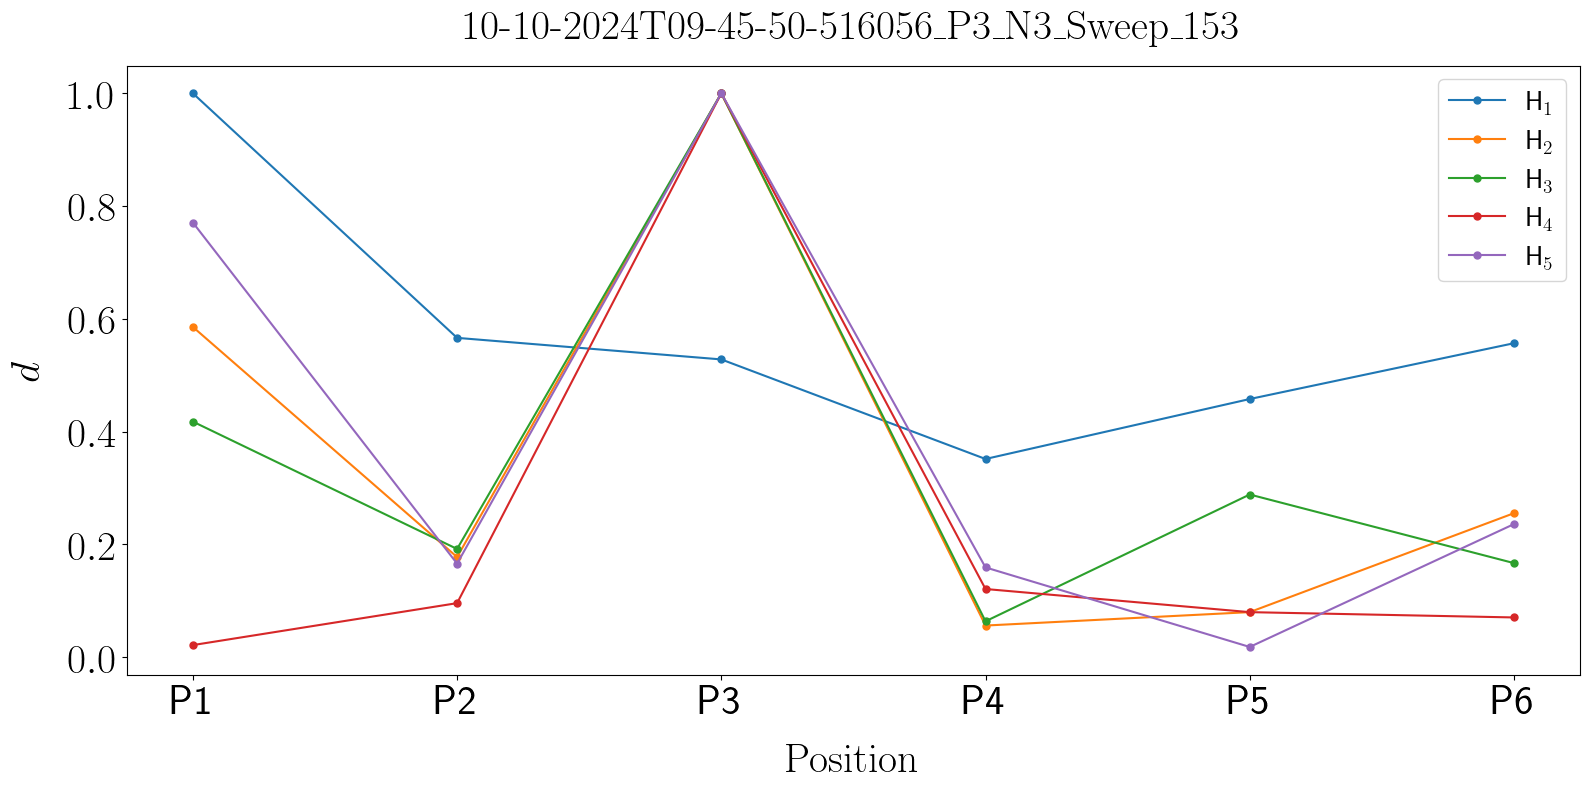

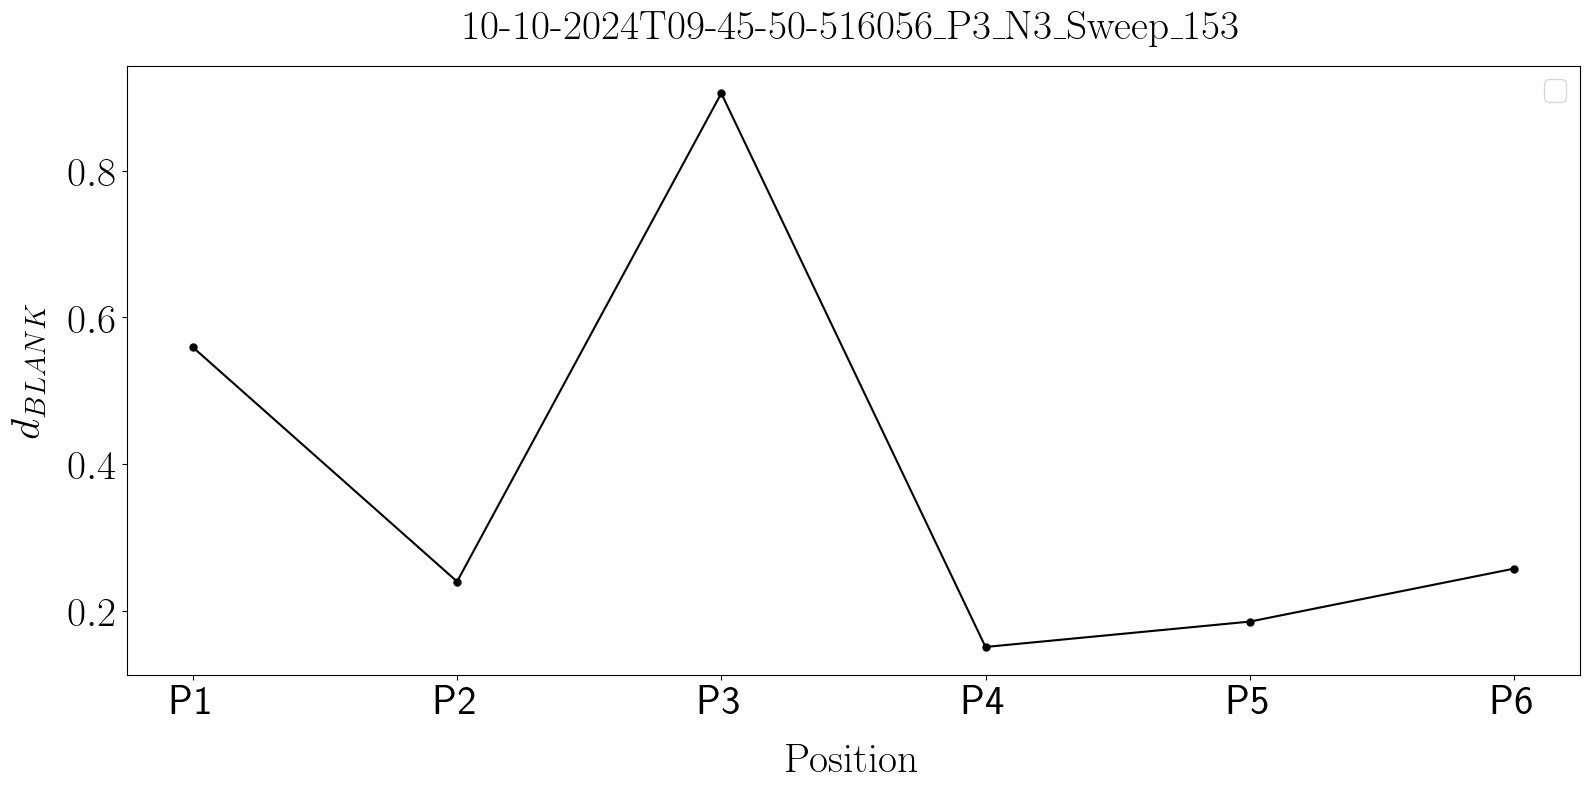

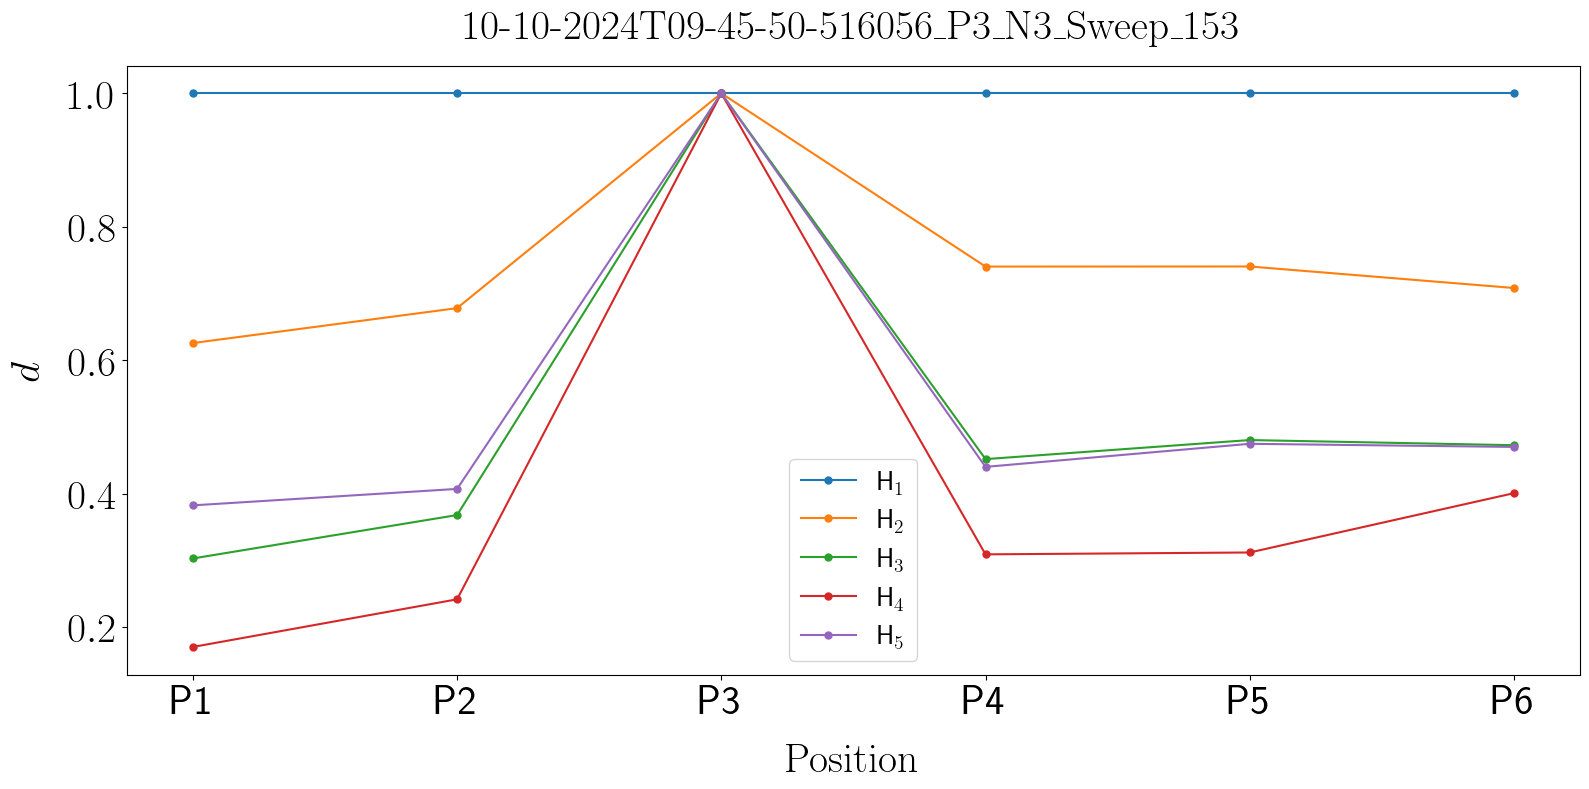

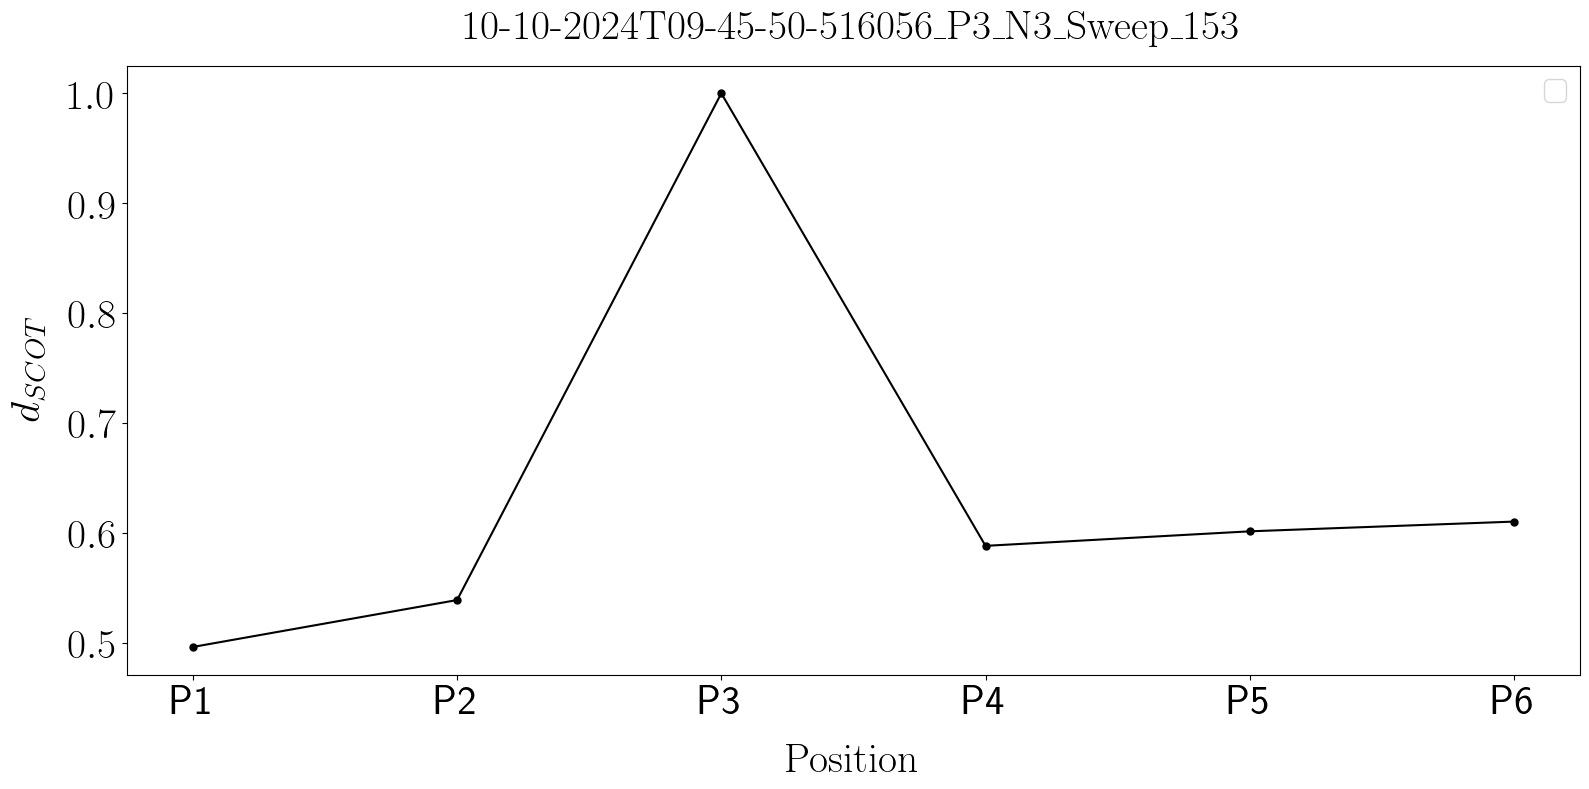

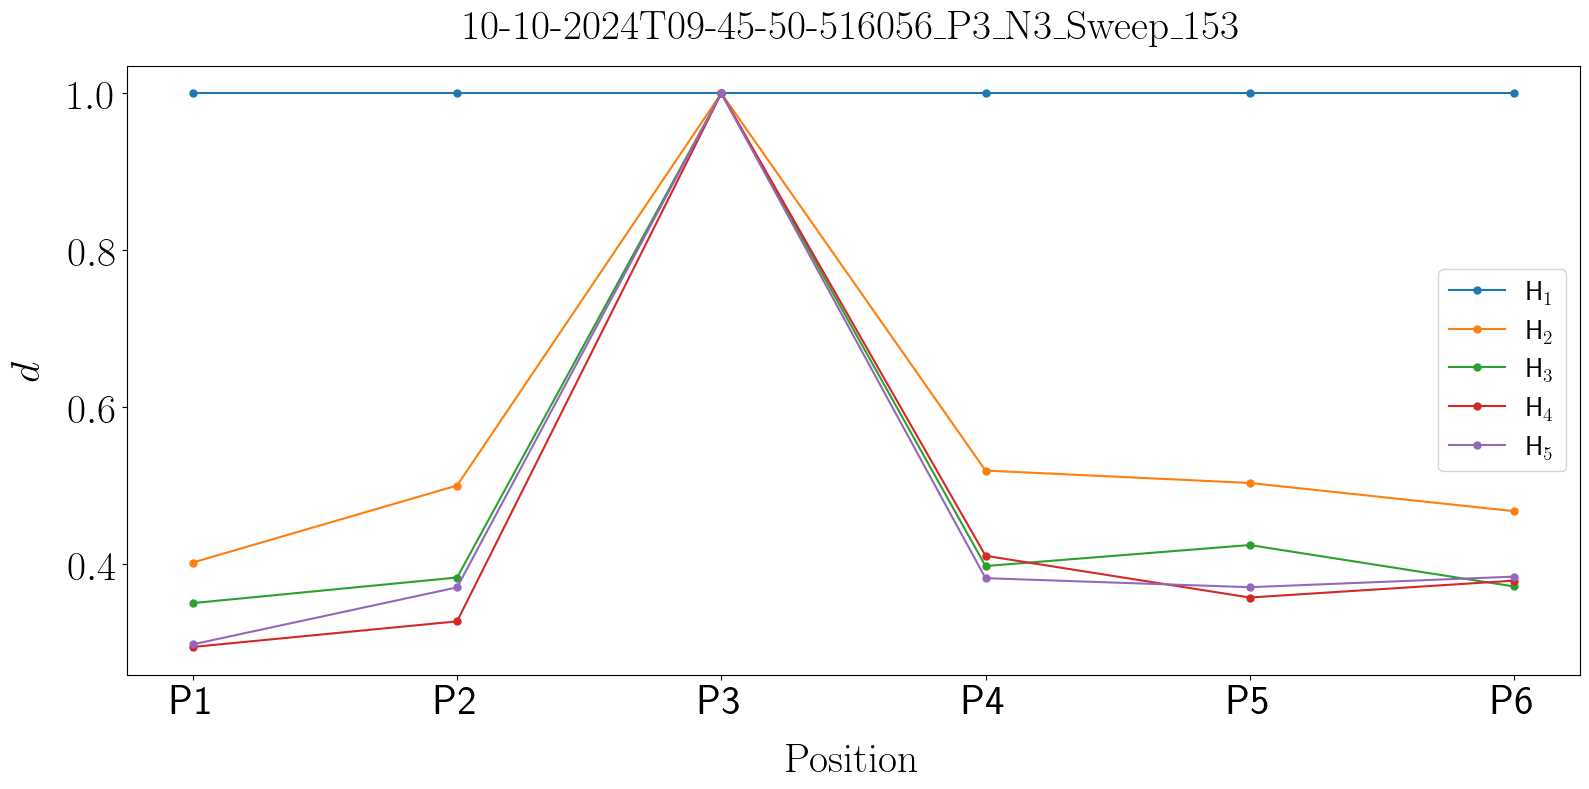

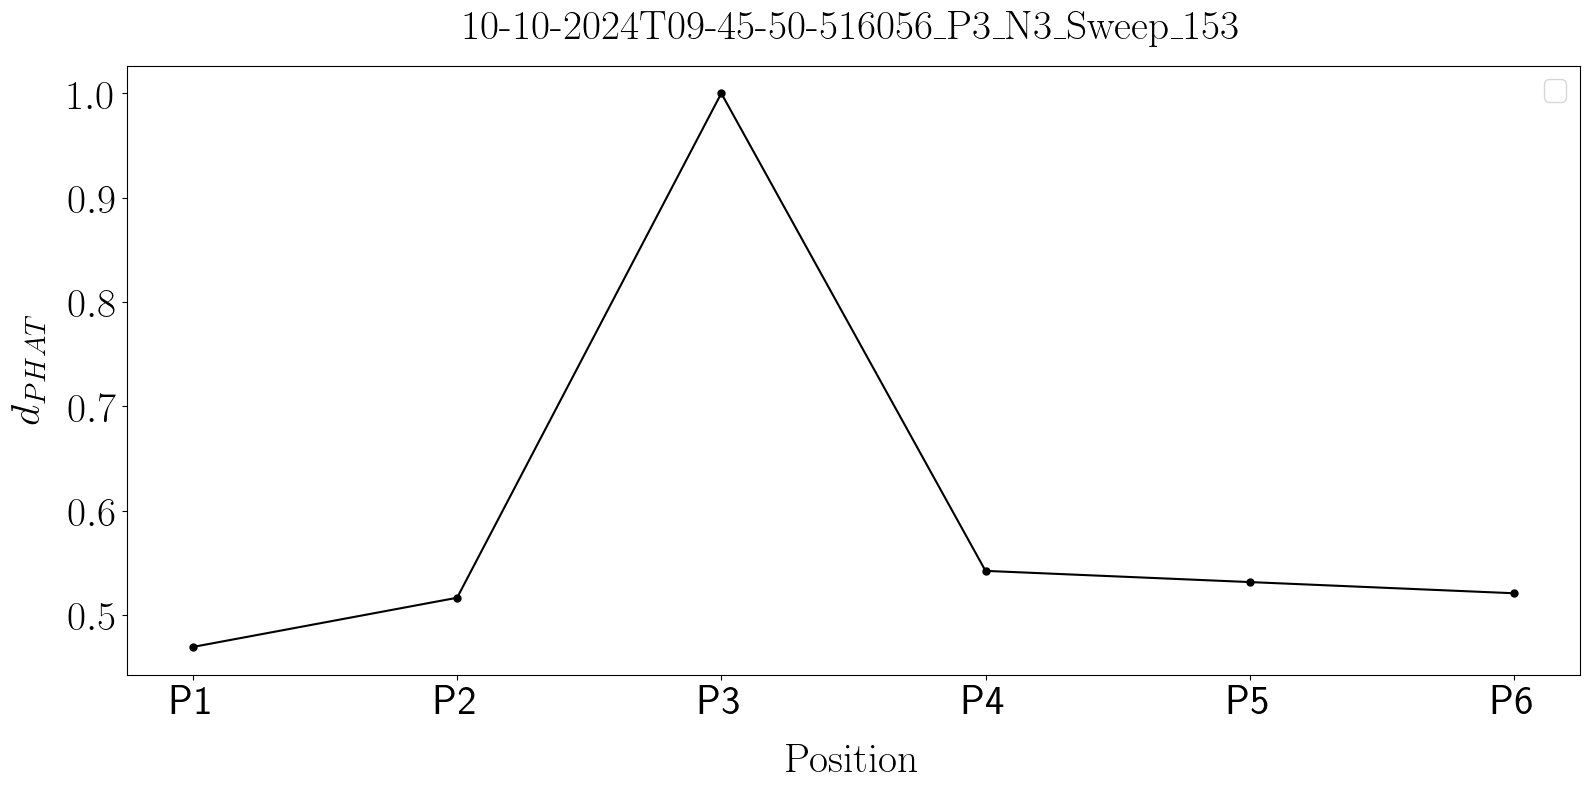

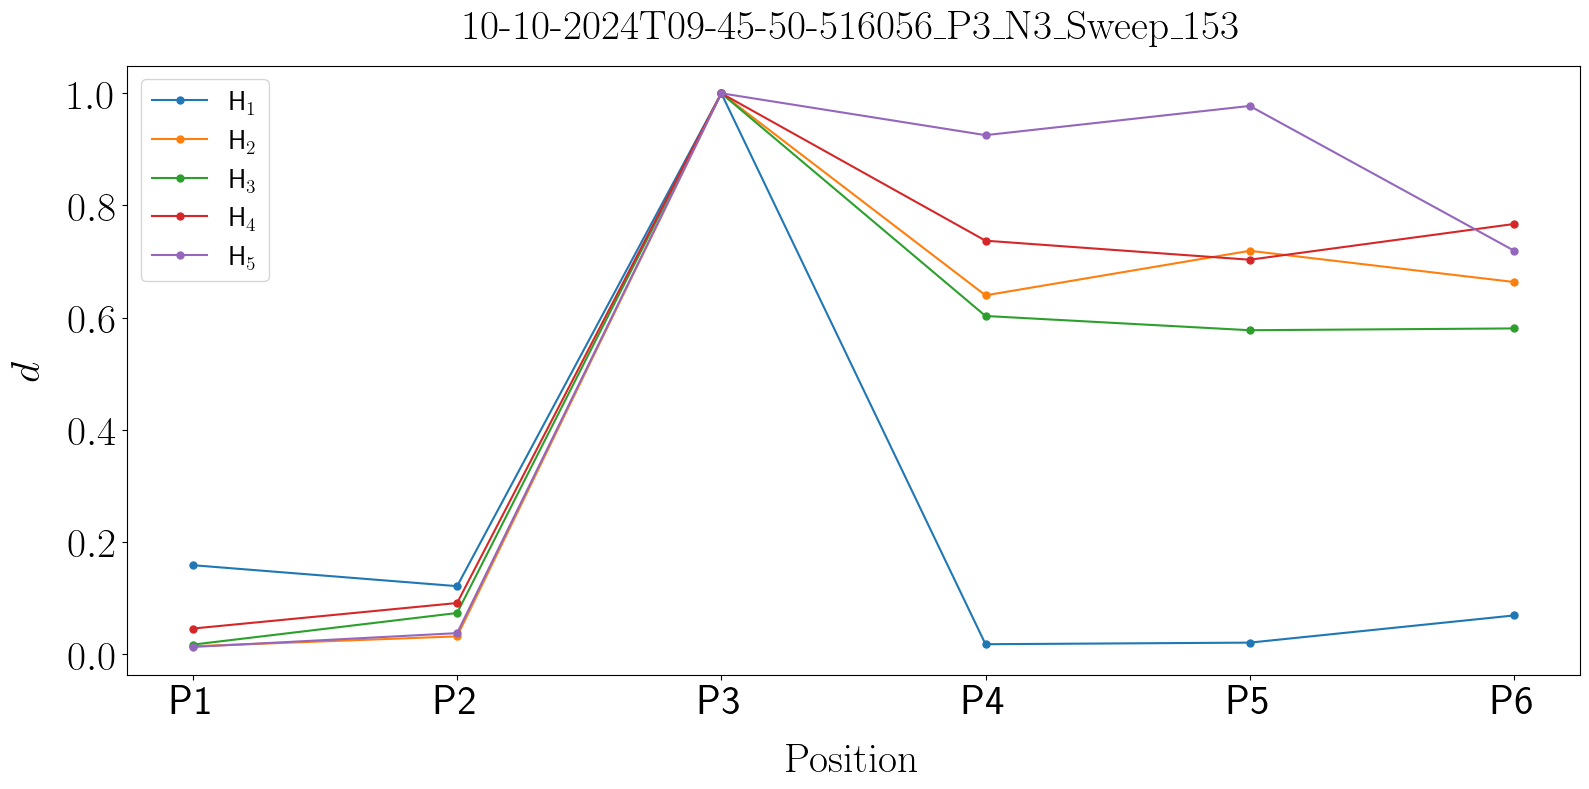

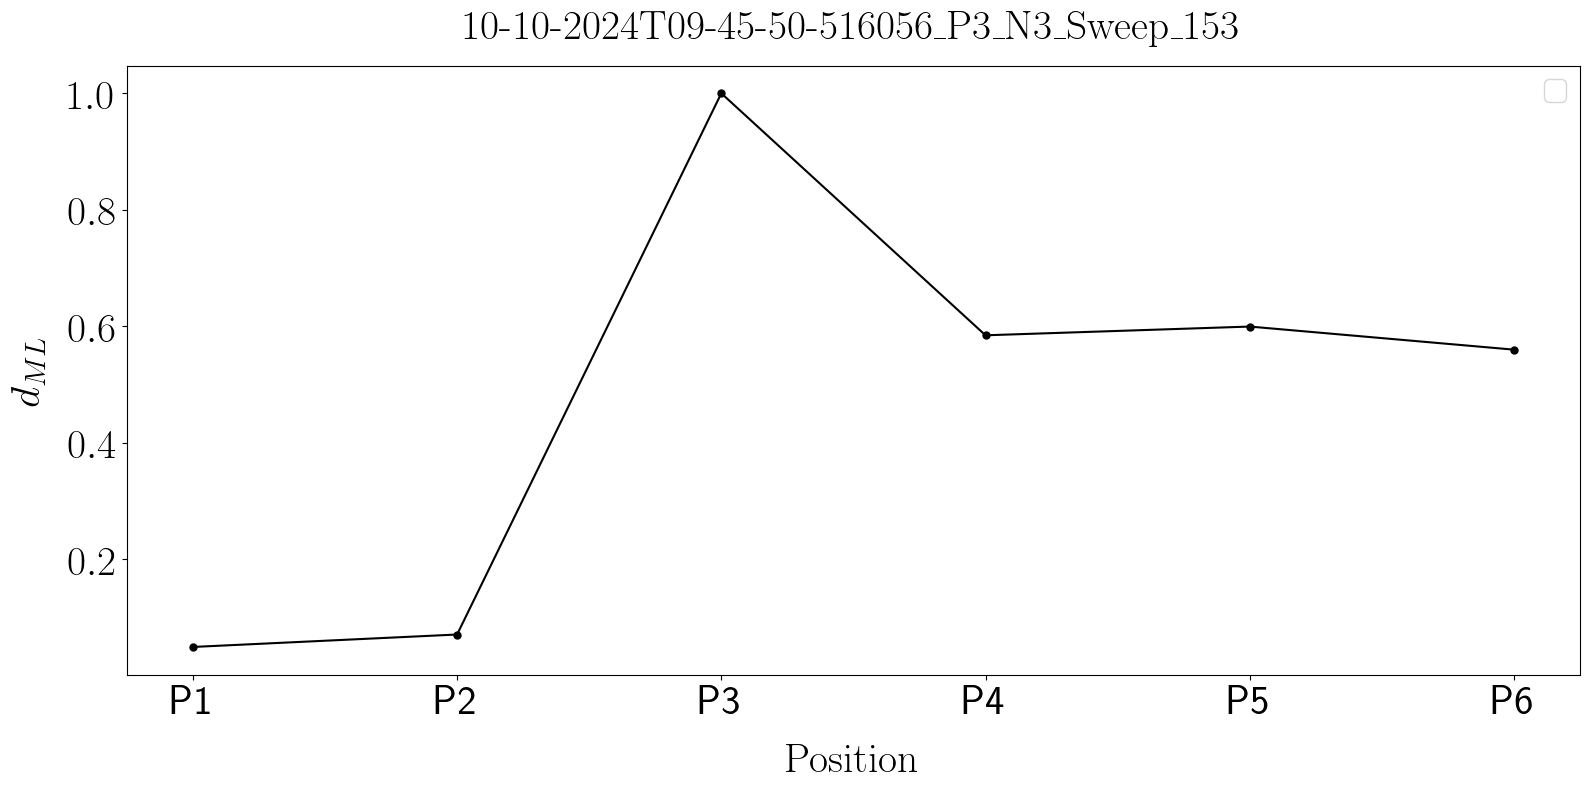

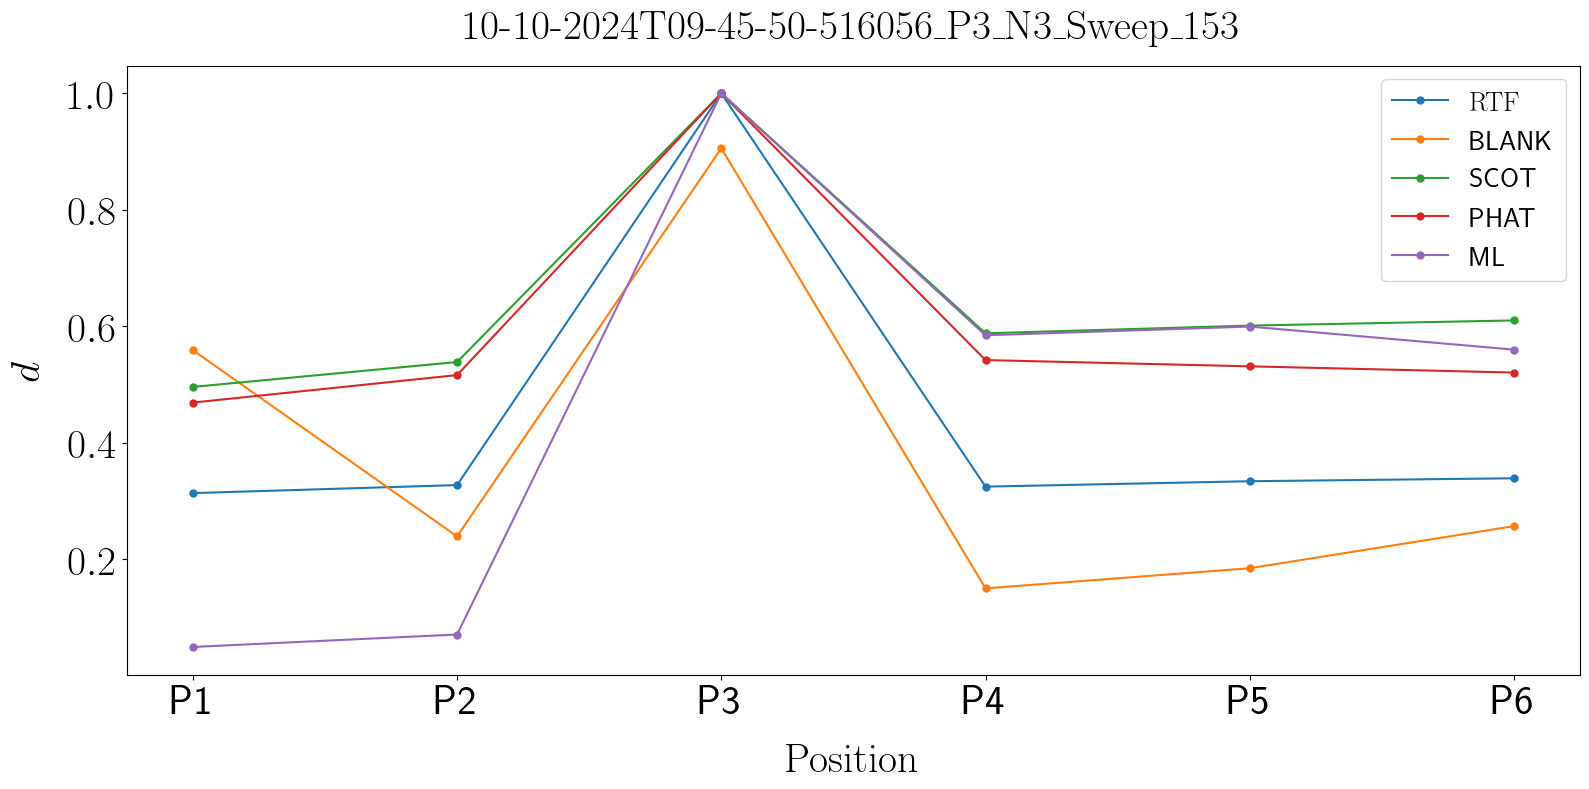

In [22]:
recording_name_to_loc = sweep_1["recording_names"]["N3"][2]
record_names = sweep_1["recording_names"]["N3"]    
# record_names = recording_names_N1

localise(
    recording_names=record_names,
    recording_name_to_loc=recording_name_to_loc,
    recording_props=recording_props,
    processing_props=processing_props,
    # pos_ids=["P1", "P2", "P3", "P4", "P5", "P6", "P8"],
)

# Source localisation using dynamic source library 

In [23]:
# Recording from the moving source : speed = 0.1 m/s
dynamic_recording = "10-10-2024T16-53-43-200271_PR_N1_346"

## Load data

In [24]:
date = dynamic_recording.split("T")[0]
data_path = os.path.join(data_root, f"Campagne_{date}")
file_name = f"{dynamic_recording}.tdms"
file_path = os.path.join(data_path, file_name)

img_path = os.path.join(img_root, dynamic_recording)
if not os.path.exists(img_path):
    os.makedirs(img_path)

data = load_fiberscope_data(file_path)
data = data.drop_vars(
    [
        "ff",
        "tt",
        "stft_amp",
        "stft_phase",
    ]
)

In [25]:
recording_props = sweep_2["recording_props"]
recording_props["n_em"] = 10
recording_props["src_end_pos"] = "P4"
recording_props["src_start_pos"] = "P1"
recording_props["dynamic_recording_name"] = dynamic_recording

n_sweep = 3
processing_props = sweep_2["processing_props"]
processing_props["time_step"] = n_sweep * sweep_2["recording_props"]["t_interp_pulse"]

## Analyse dynamic recording 

### Split recording into shorter sections to be analysed 

In [26]:
# Unpack usefull props
src_speed = recording_props.get("src_speed", 0.1)  # Source speed in m/s
src_start_pos = recording_props.get("src_start_pos", "P1")  # Source start position id
dynamic_recording_name = recording_props.get("dynamic_recording_name", "")
src_end_pos = recording_props.get("src_end_pos", "P4")  # Source end position id

time_step = processing_props.get(
    "time_step", 10
)  # Time step to use to devide the recording into

n_records = 90
displacement_from_start_pos = [
    ((i + 1) * time_step - time_step / 2) * src_speed for i in range(n_records)
]
recording_names_dynamic = [
    f"{dynamic_recording_name}_{src_start_pos}_r{np.round(dr, 2)}m_{src_end_pos}"
    for dr in displacement_from_start_pos
]

In [27]:
recording_names_dynamic[82:]

['10-10-2024T16-53-43-200271_PR_N1_346_P1_r24.75m_P4',
 '10-10-2024T16-53-43-200271_PR_N1_346_P1_r25.05m_P4',
 '10-10-2024T16-53-43-200271_PR_N1_346_P1_r25.35m_P4',
 '10-10-2024T16-53-43-200271_PR_N1_346_P1_r25.65m_P4',
 '10-10-2024T16-53-43-200271_PR_N1_346_P1_r25.95m_P4',
 '10-10-2024T16-53-43-200271_PR_N1_346_P1_r26.25m_P4',
 '10-10-2024T16-53-43-200271_PR_N1_346_P1_r26.55m_P4',
 '10-10-2024T16-53-43-200271_PR_N1_346_P1_r26.85m_P4']

### Run analysis on each section

In [28]:
# for recording_name in recording_names_dynamic[82:]:
#     run_analysis(
#         recording_name, recording_props, processing_props, plot_rtf_estimation=True, verbose=True
#     )

## Localise 

Processing recording 09-10-2024T10-39-11-308093_P1_N5_Sweep_38 - RTF estimation


C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:349: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(os.path.join(data.attrs["img_path"], "original_signal.png"))
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:359: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(os.path.join(data.attrs["img_path"], "only_noise.png"))
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:139: RuntimeWarning: divide by zero encountered in divide
  w = 1 / Rxy * gamma_xy / (1 - gamma_xy)
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:141: RuntimeWarning: invalid value encountered in multiply
  gcc_f = w * Rxy


Analyzing recording 09-10-2024T10-39-11-308093_P1_N5_Sweep_38 - Plotting RTF estimation results


c:\Users\baptiste.menetrier\.virtualenvs\phd-FBjz4hBd\Lib\site-packages\xarray\namedarray\core.py:264: UserWarning: Duplicate dimension names present: dimensions {'h_index'} appear more than once in dims=('f_csdm', 'h_index', 'h_index'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  self._dims = self._parse_dimensions(dims)
c:\Users\baptiste.menetrier\.virtualenvs\phd-FBjz4hBd\Lib\site-packages\xarray\namedarray\core.py:264: UserWarning: Duplicate dimension names present: dimensions {'h_index'} appear more than once in dims=('f_csdm', 'h_index', 'h_index'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you renam

Processing recording 09-10-2024T16-55-08-243011_P2_N5_Sweep_97 - RTF estimation


C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:359: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(os.path.join(data.attrs["img_path"], "only_noise.png"))
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:139: RuntimeWarning: divide by zero encountered in divide
  w = 1 / Rxy * gamma_xy / (1 - gamma_xy)
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:139: RuntimeWarning: invalid value encountered in divide
  w = 1 / Rxy * gamma_xy / (1 - gamma_xy)
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:141: RuntimeWarning: invalid value encountered in multiply
  gcc_f = w * Rxy


Analyzing recording 09-10-2024T16-55-08-243011_P2_N5_Sweep_97 - Plotting RTF estimation results


c:\Users\baptiste.menetrier\.virtualenvs\phd-FBjz4hBd\Lib\site-packages\xarray\namedarray\core.py:264: UserWarning: Duplicate dimension names present: dimensions {'h_index'} appear more than once in dims=('f_csdm', 'h_index', 'h_index'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  self._dims = self._parse_dimensions(dims)
c:\Users\baptiste.menetrier\.virtualenvs\phd-FBjz4hBd\Lib\site-packages\xarray\namedarray\core.py:264: UserWarning: Duplicate dimension names present: dimensions {'h_index'} appear more than once in dims=('f_csdm', 'h_index', 'h_index'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you renam

Processing recording 10-10-2024T09-47-33-438942_P3_N5_Sweep_155 - RTF estimation


C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:349: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(os.path.join(data.attrs["img_path"], "original_signal.png"))
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:354: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(os.path.join(data.attrs["img_path"], "signal_plus_noise.png"))
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:359: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(os.path.join(data.attrs["img_path"], "only_noise.png"))
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:139: RuntimeWarning: divide by zero encountered in divide
  w = 1 / Rxy * gamma_xy / (1 - gamma_xy)
C:\Users\baptiste.menetr

Analyzing recording 10-10-2024T09-47-33-438942_P3_N5_Sweep_155 - Plotting RTF estimation results


c:\Users\baptiste.menetrier\.virtualenvs\phd-FBjz4hBd\Lib\site-packages\xarray\namedarray\core.py:264: UserWarning: Duplicate dimension names present: dimensions {'h_index'} appear more than once in dims=('f_csdm', 'h_index', 'h_index'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  self._dims = self._parse_dimensions(dims)
c:\Users\baptiste.menetrier\.virtualenvs\phd-FBjz4hBd\Lib\site-packages\xarray\namedarray\core.py:264: UserWarning: Duplicate dimension names present: dimensions {'h_index'} appear more than once in dims=('f_csdm', 'h_index', 'h_index'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you renam

Processing recording 10-10-2024T12-06-31-200643_P4_N5_Sweep_215 - RTF estimation


C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:349: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(os.path.join(data.attrs["img_path"], "original_signal.png"))
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:359: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(os.path.join(data.attrs["img_path"], "only_noise.png"))
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:139: RuntimeWarning: divide by zero encountered in divide
  w = 1 / Rxy * gamma_xy / (1 - gamma_xy)
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:141: RuntimeWarning: invalid value encountered in multiply
  gcc_f = w * Rxy


Analyzing recording 10-10-2024T12-06-31-200643_P4_N5_Sweep_215 - Plotting RTF estimation results


c:\Users\baptiste.menetrier\.virtualenvs\phd-FBjz4hBd\Lib\site-packages\xarray\namedarray\core.py:264: UserWarning: Duplicate dimension names present: dimensions {'h_index'} appear more than once in dims=('f_csdm', 'h_index', 'h_index'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  self._dims = self._parse_dimensions(dims)
c:\Users\baptiste.menetrier\.virtualenvs\phd-FBjz4hBd\Lib\site-packages\xarray\namedarray\core.py:264: UserWarning: Duplicate dimension names present: dimensions {'h_index'} appear more than once in dims=('f_csdm', 'h_index', 'h_index'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you renam

Processing recording 10-10-2024T14-45-21-047719_P5_N5_Sweep_271 - RTF estimation


C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:349: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(os.path.join(data.attrs["img_path"], "original_signal.png"))
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:359: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(os.path.join(data.attrs["img_path"], "only_noise.png"))
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:139: RuntimeWarning: divide by zero encountered in divide
  w = 1 / Rxy * gamma_xy / (1 - gamma_xy)
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:141: RuntimeWarning: invalid value encountered in multiply
  gcc_f = w * Rxy


Analyzing recording 10-10-2024T14-45-21-047719_P5_N5_Sweep_271 - Plotting RTF estimation results


c:\Users\baptiste.menetrier\.virtualenvs\phd-FBjz4hBd\Lib\site-packages\xarray\namedarray\core.py:264: UserWarning: Duplicate dimension names present: dimensions {'h_index'} appear more than once in dims=('f_csdm', 'h_index', 'h_index'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  self._dims = self._parse_dimensions(dims)
c:\Users\baptiste.menetrier\.virtualenvs\phd-FBjz4hBd\Lib\site-packages\xarray\namedarray\core.py:264: UserWarning: Duplicate dimension names present: dimensions {'h_index'} appear more than once in dims=('f_csdm', 'h_index', 'h_index'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you renam

Processing recording 10-10-2024T15-57-57-549910_P6_N5_Sweep_327 - RTF estimation


C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:349: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(os.path.join(data.attrs["img_path"], "original_signal.png"))
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:359: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(os.path.join(data.attrs["img_path"], "only_noise.png"))
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:139: RuntimeWarning: divide by zero encountered in divide
  w = 1 / Rxy * gamma_xy / (1 - gamma_xy)
C:\Users\baptiste.menetrier\Desktop\devPy\phd\real_data_analysis\fiberscope\fiberscope_utils.py:141: RuntimeWarning: invalid value encountered in multiply
  gcc_f = w * Rxy


Analyzing recording 10-10-2024T15-57-57-549910_P6_N5_Sweep_327 - Plotting RTF estimation results


c:\Users\baptiste.menetrier\.virtualenvs\phd-FBjz4hBd\Lib\site-packages\xarray\namedarray\core.py:264: UserWarning: Duplicate dimension names present: dimensions {'h_index'} appear more than once in dims=('f_csdm', 'h_index', 'h_index'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  self._dims = self._parse_dimensions(dims)
c:\Users\baptiste.menetrier\.virtualenvs\phd-FBjz4hBd\Lib\site-packages\xarray\namedarray\core.py:264: UserWarning: Duplicate dimension names present: dimensions {'h_index'} appear more than once in dims=('f_csdm', 'h_index', 'h_index'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you renam

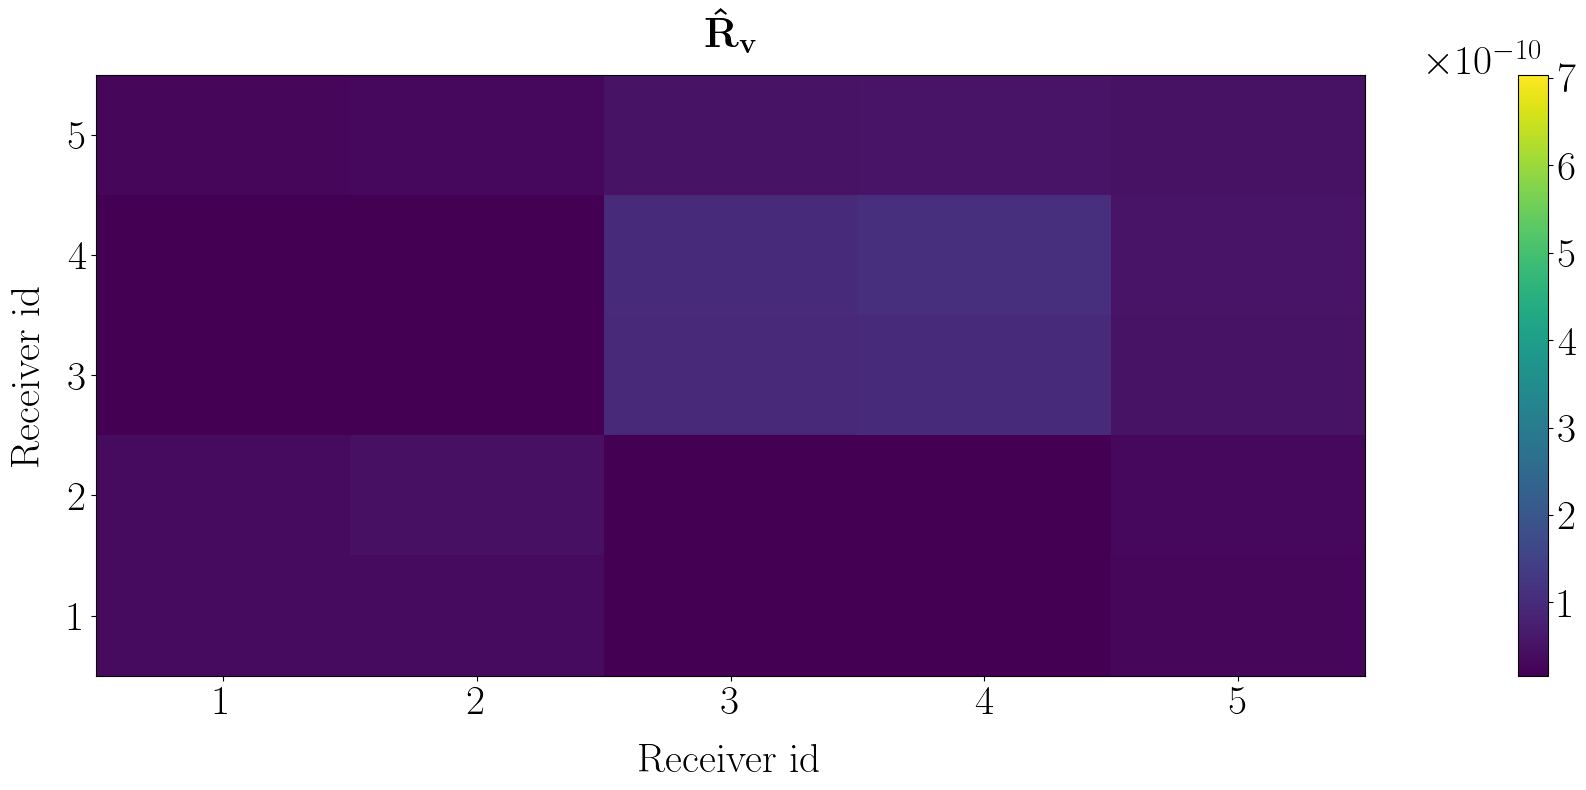

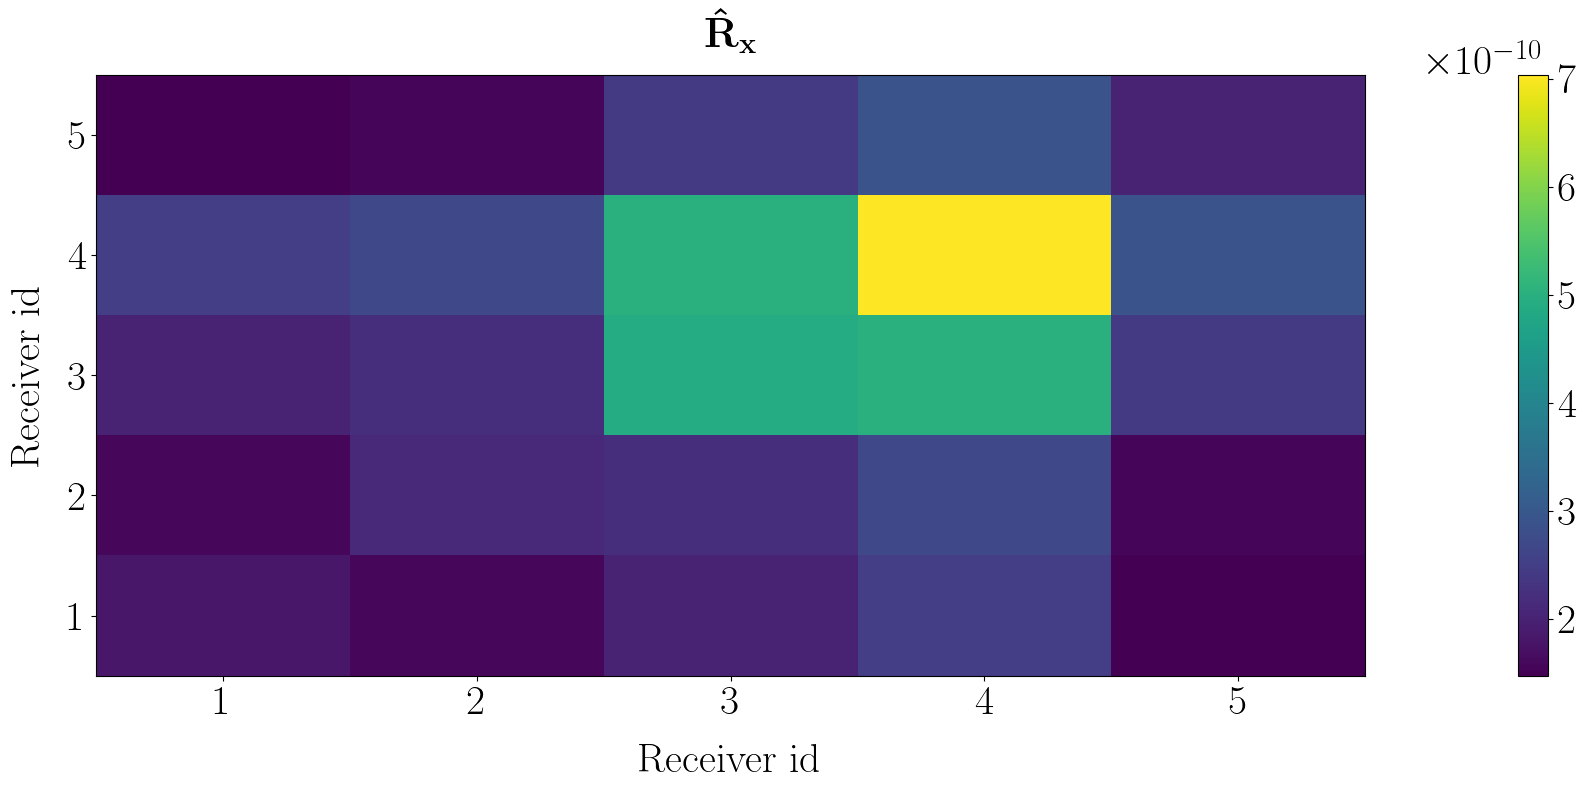

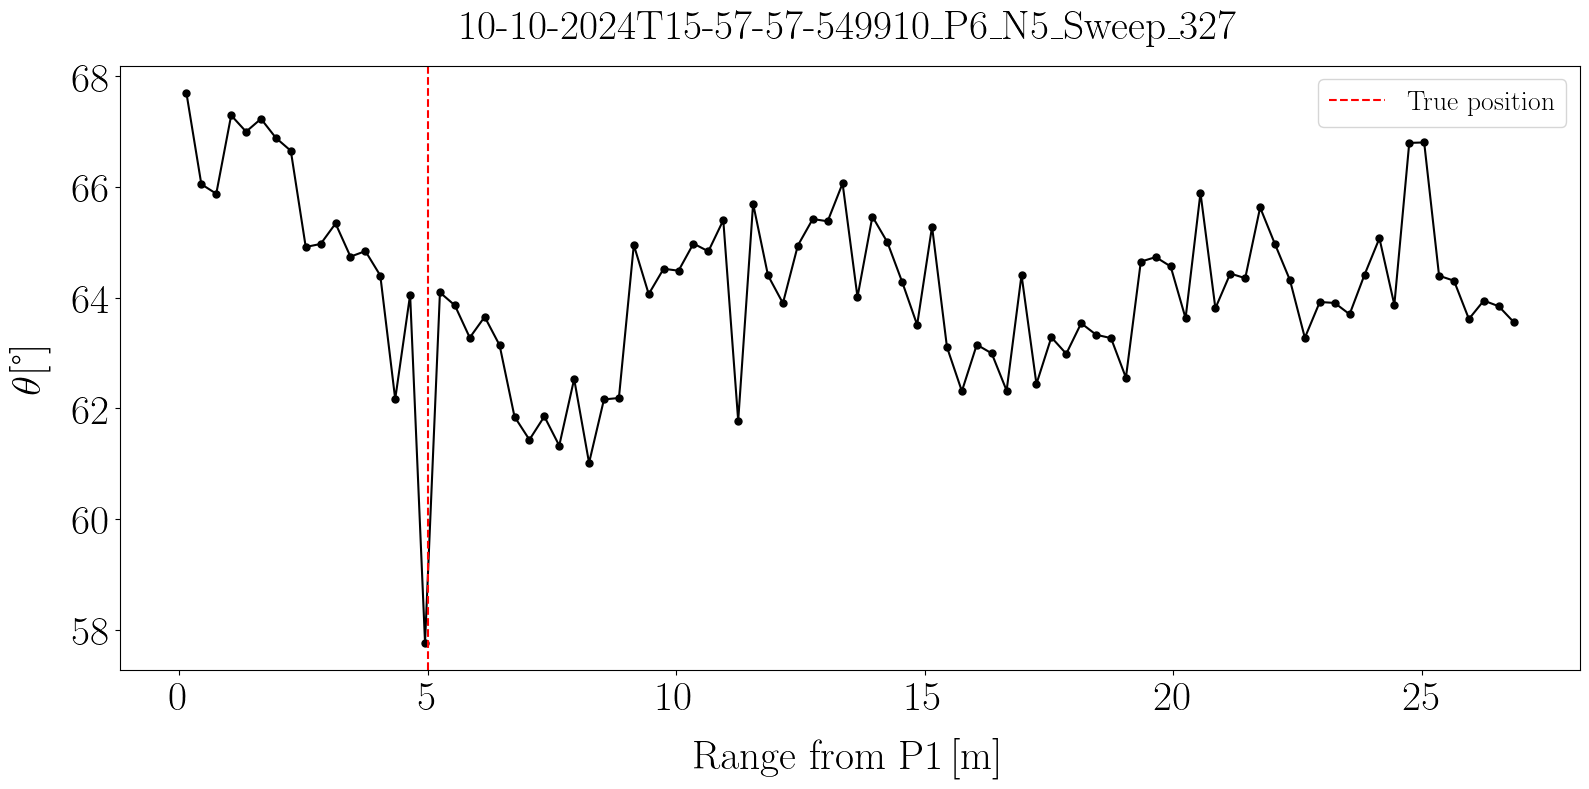

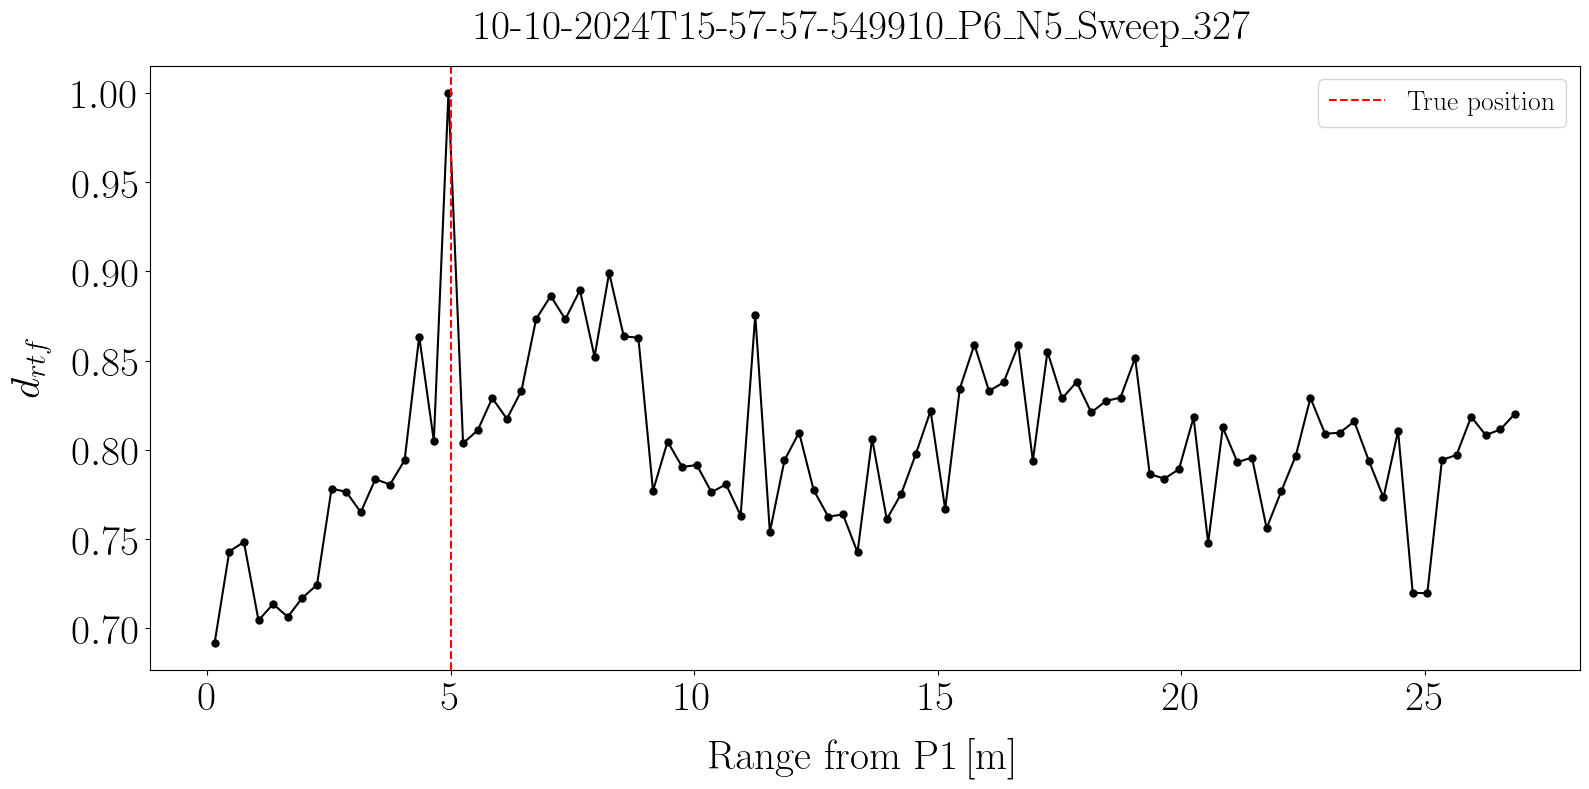

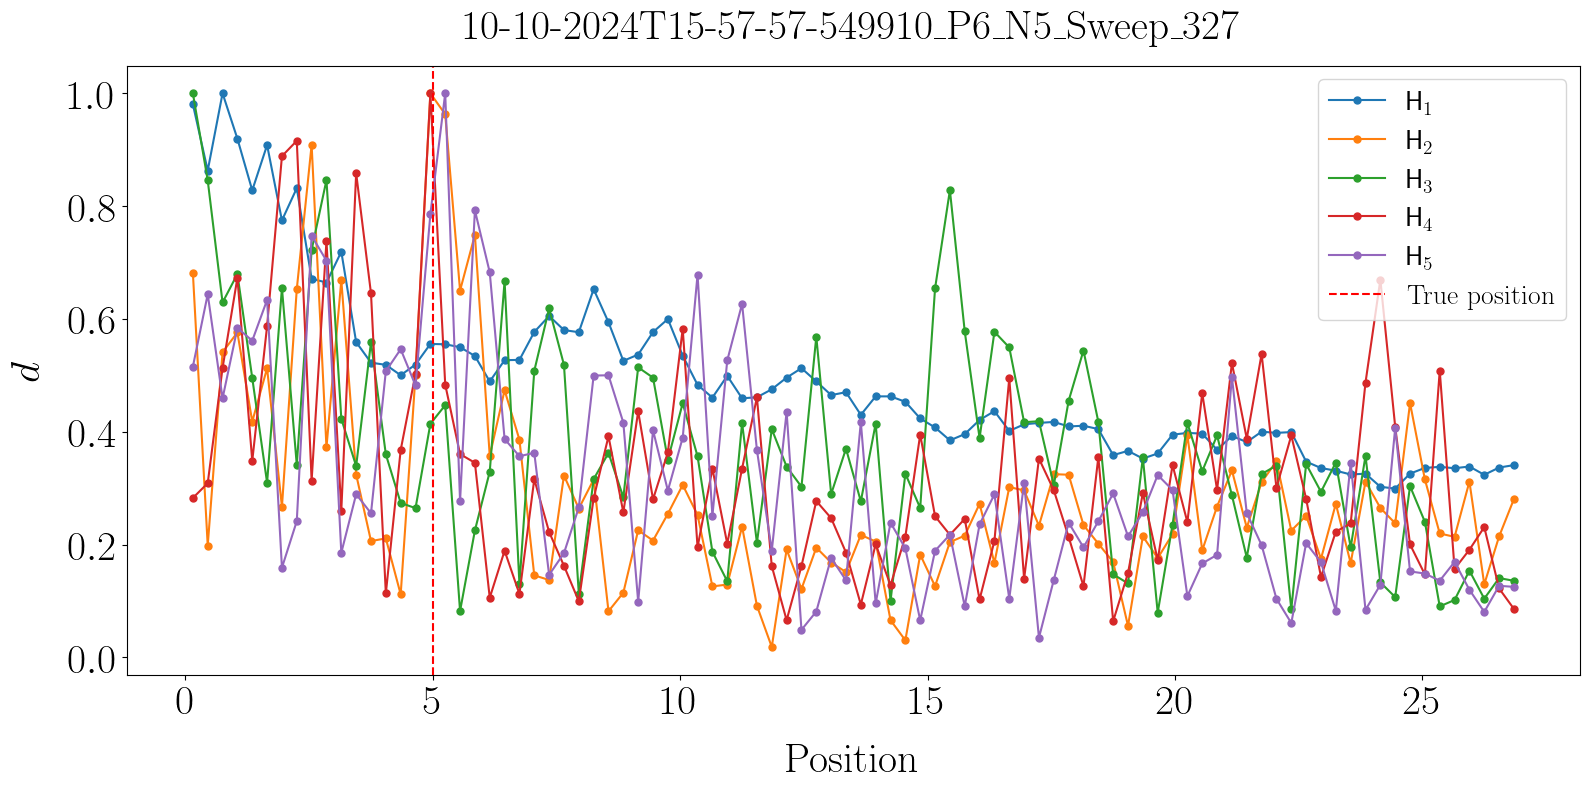

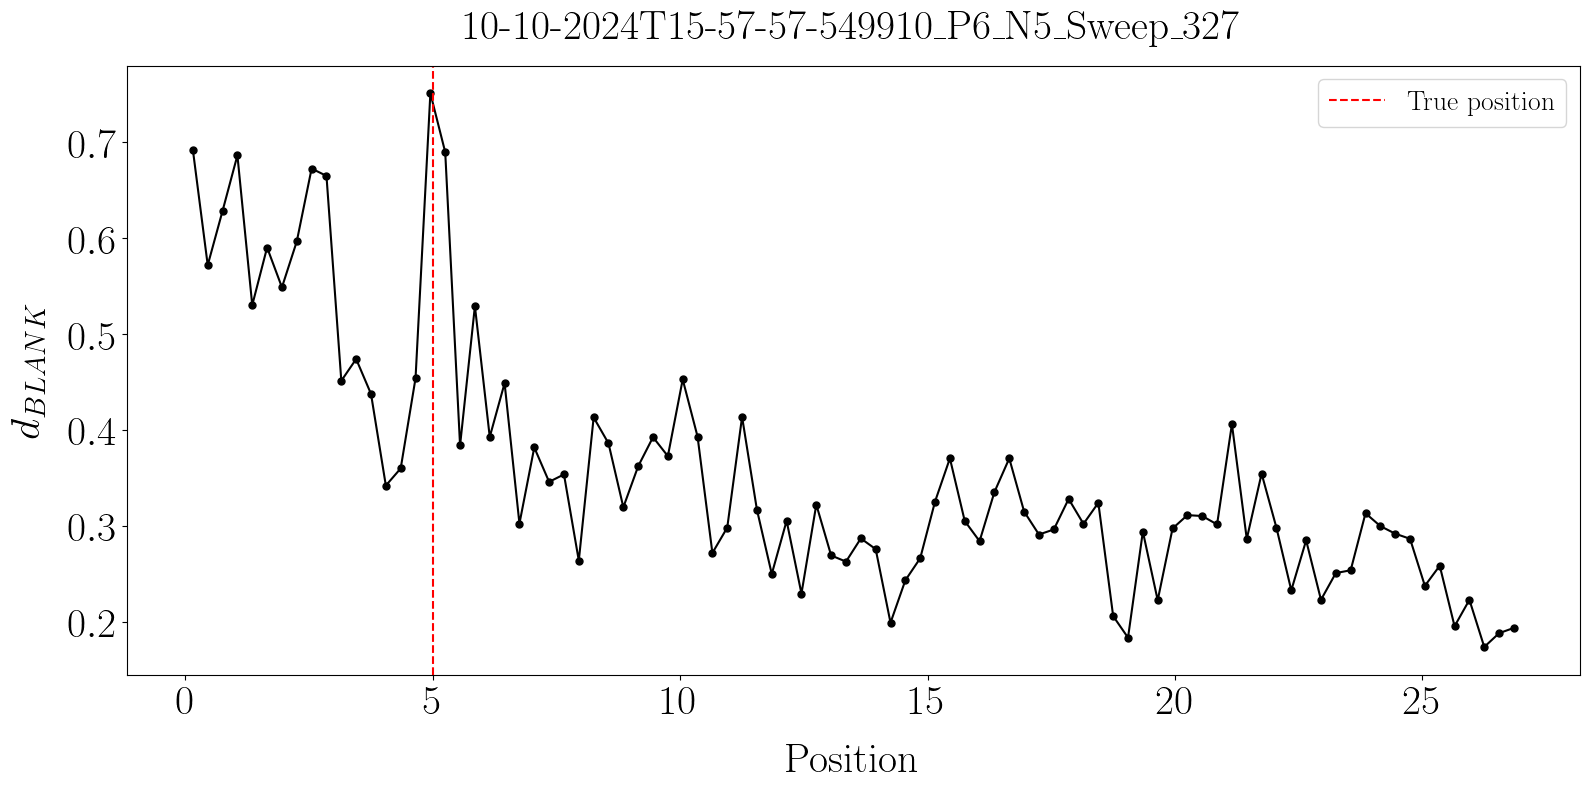

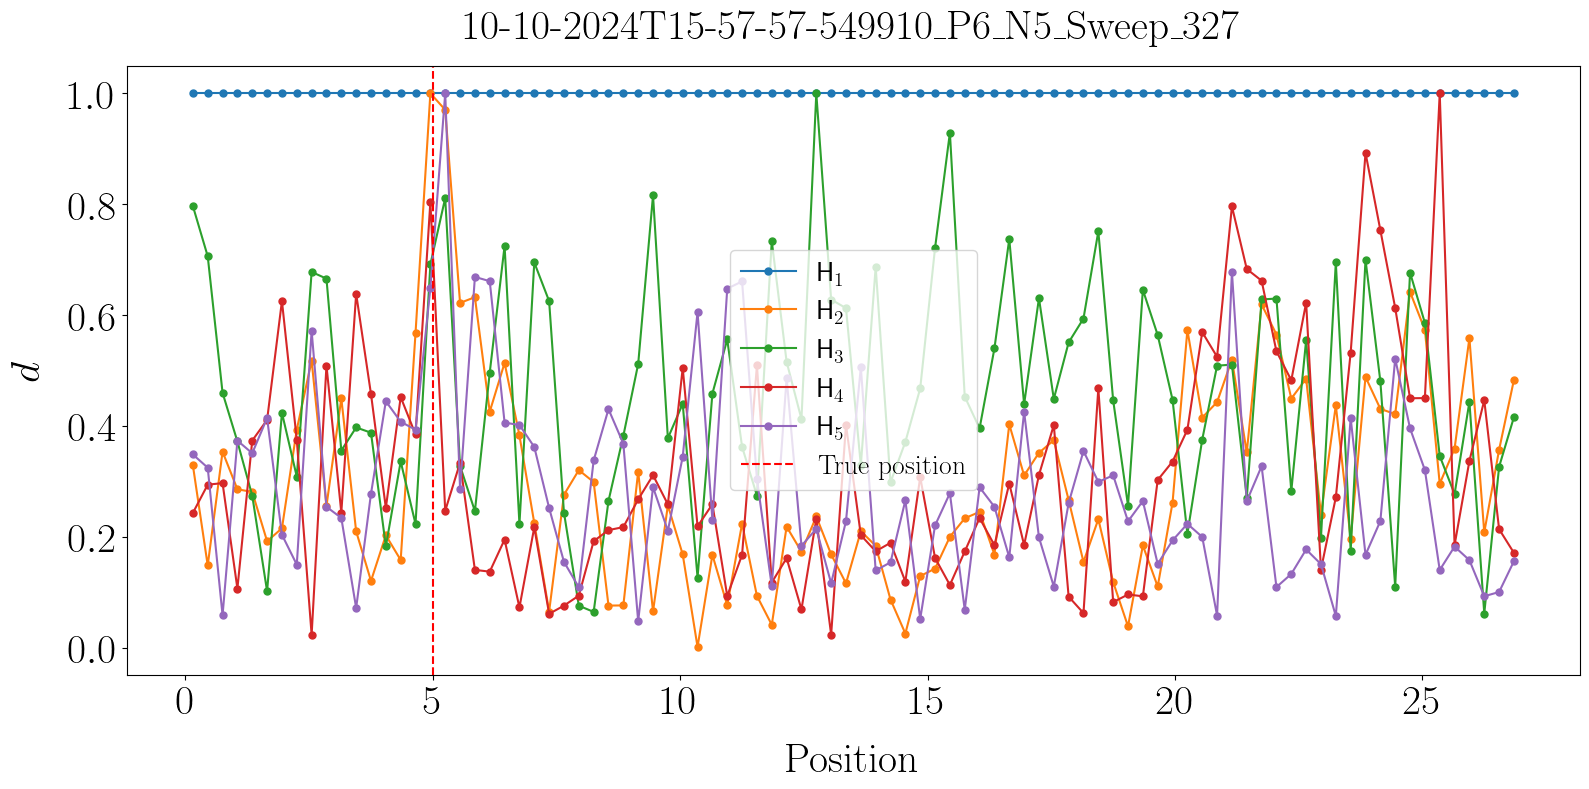

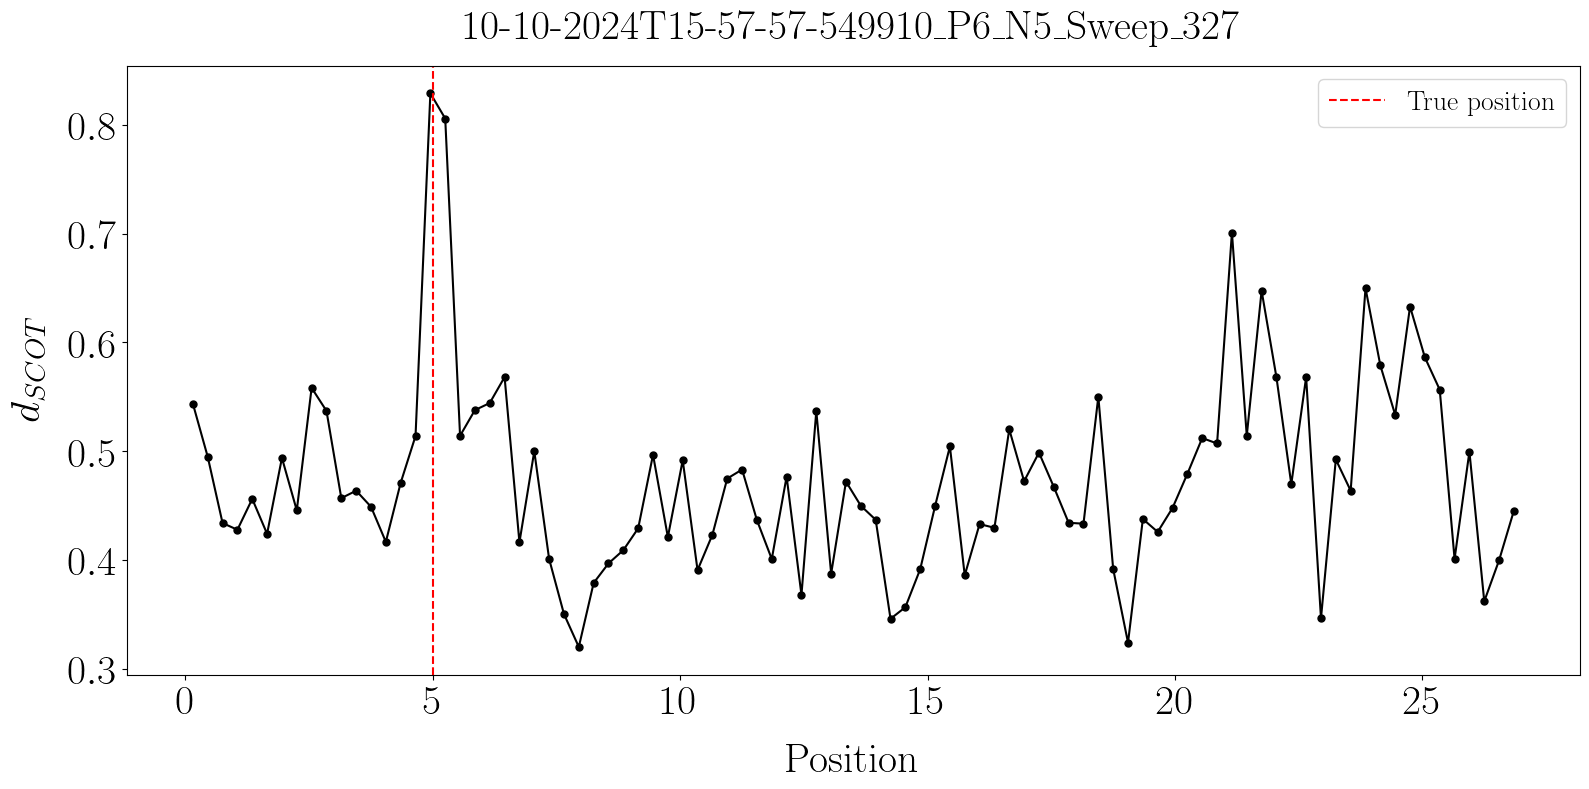

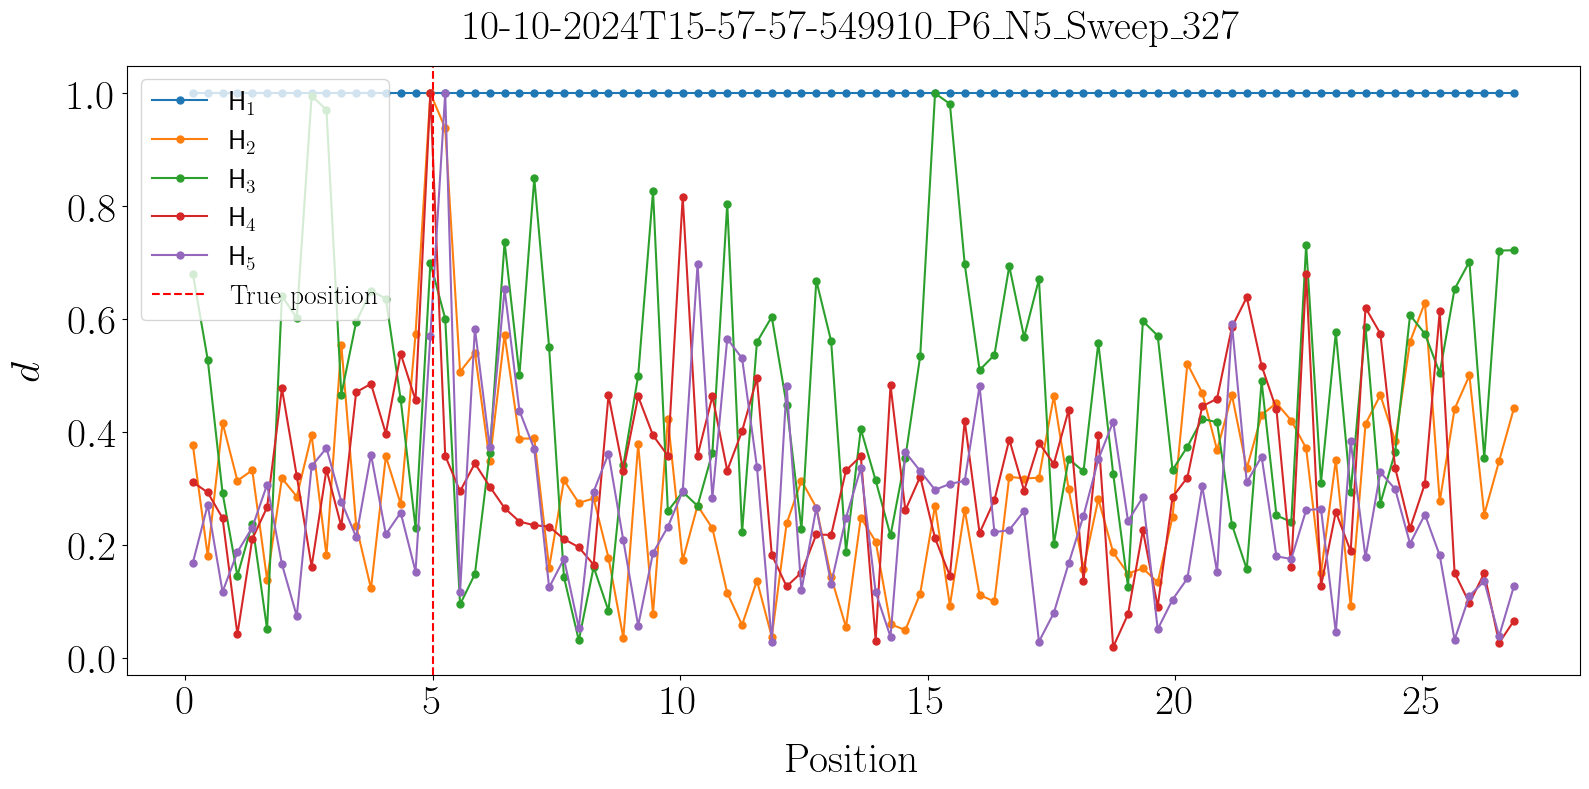

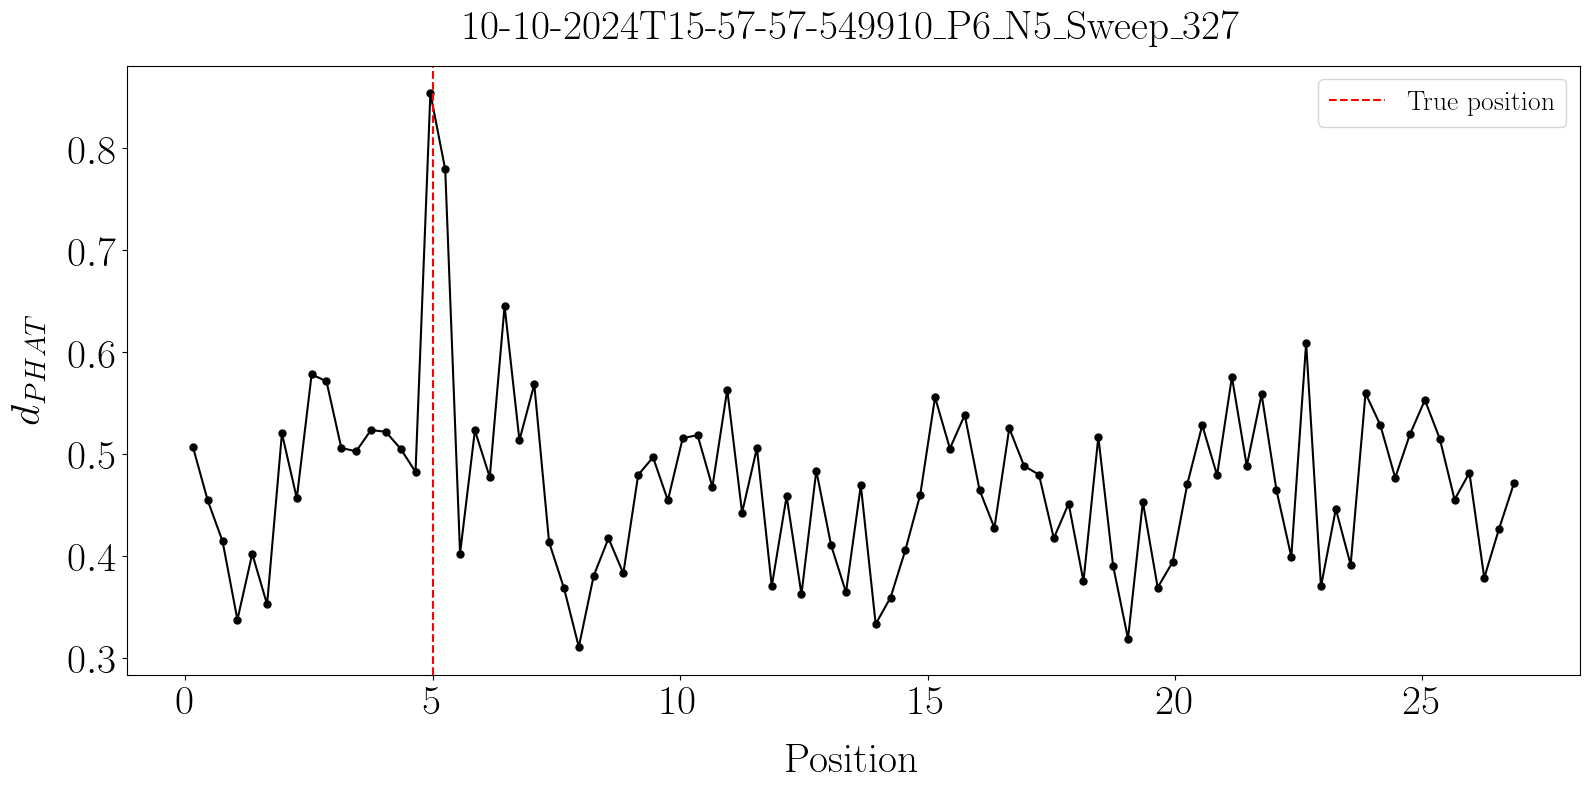

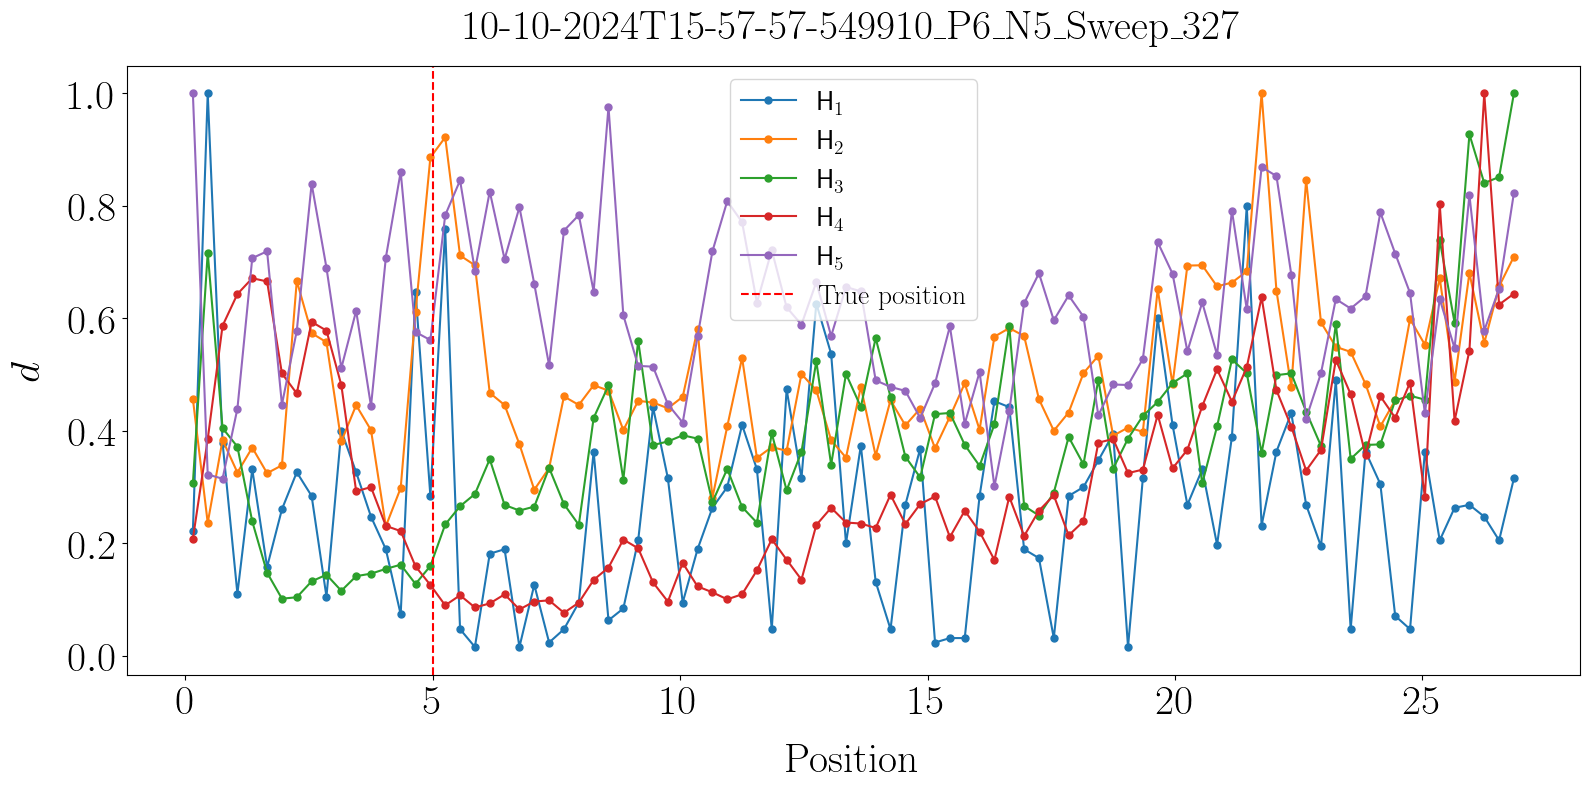

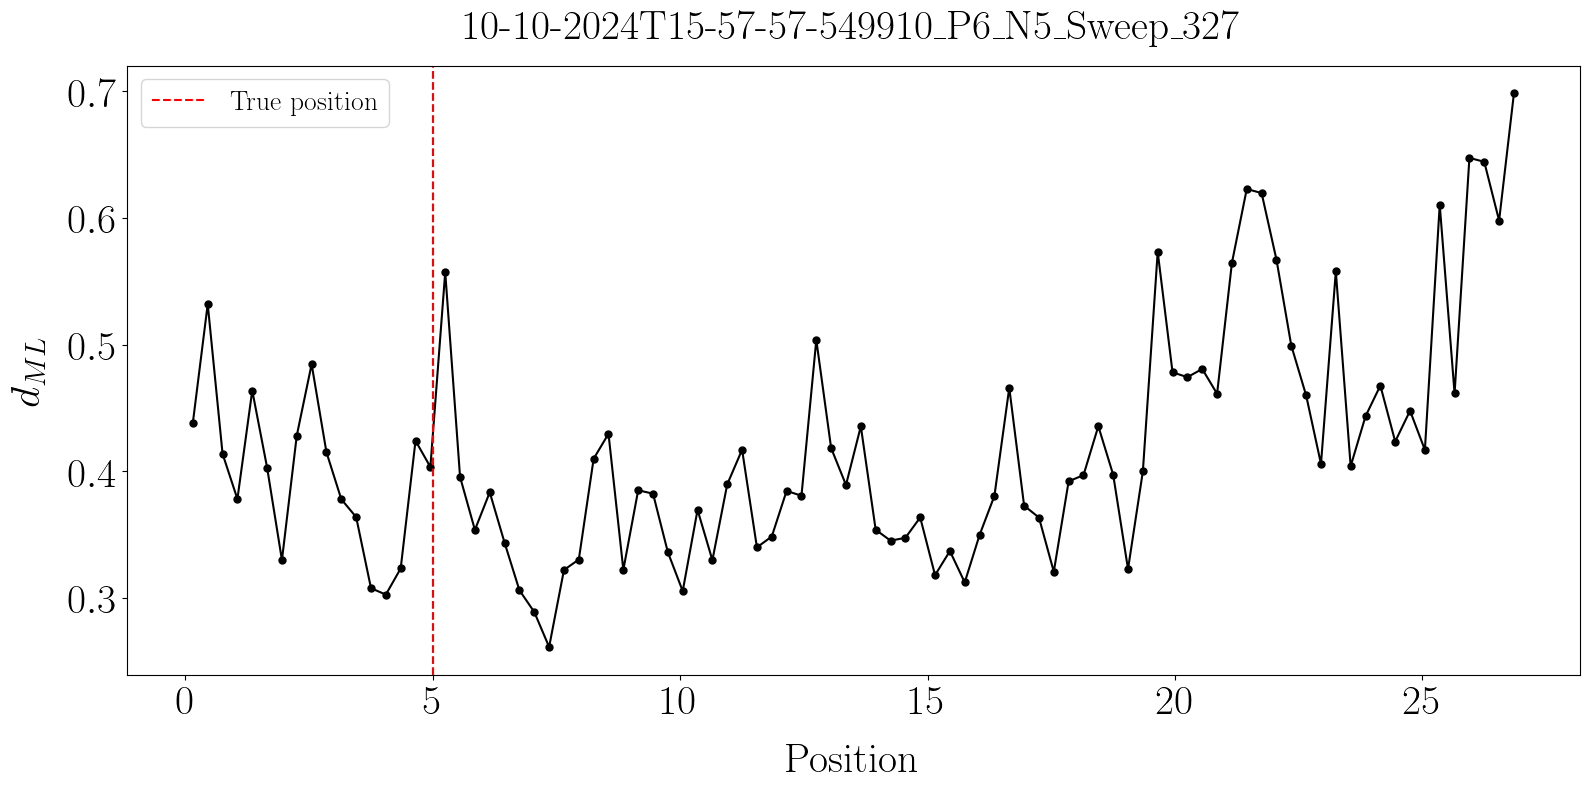

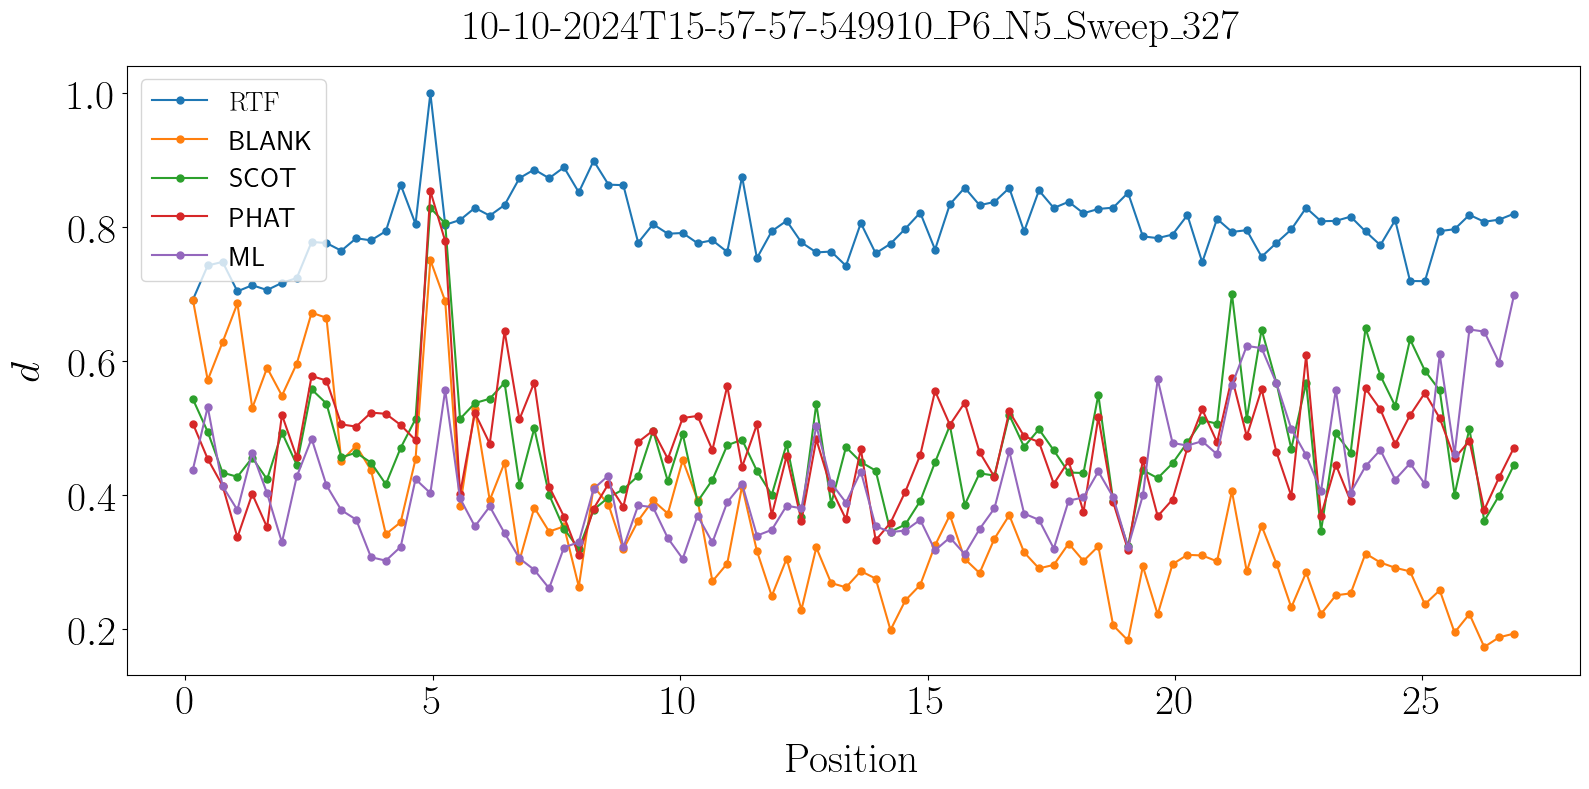

In [29]:
# records_to_loc = ["10-10-2024T16-53-43-200271_PR_N1_346_P1_r20.25m_P4"]
em_lvl_to_loc = "N5"
records_to_loc = sweep_1["recording_names"][em_lvl_to_loc]

dict_loc_static = {}

for recording_name_to_loc in records_to_loc:

    run_analysis(
        recording_name_to_loc,
        recording_props,
        processing_props,
        plot_rtf_estimation=True,
        verbose=True,
    )

    # Localizing static records
    pos_id = recording_name_to_loc.split("_")[1]
    th_pos = dict_th_pos[pos_id]
    # Localizing section from dynamic record
    # th_pos = float(recording_name_to_loc.split("_")[-2][1:-1])

    range_from_p1, dist, _, _ = localise(
        recording_names=recording_names_dynamic,
        recording_name_to_loc=recording_name_to_loc,
        recording_props=recording_props,
        processing_props=processing_props,
        th_pos=th_pos,
    )
    r_hat = range_from_p1[np.argmin(dist)]
    dict_loc_static[recording_name_to_loc] = {
        "d": dist,
        "r": range_from_p1,
        "r_th": th_pos,
        "r_hat": r_hat,
    }

## Trajectography 

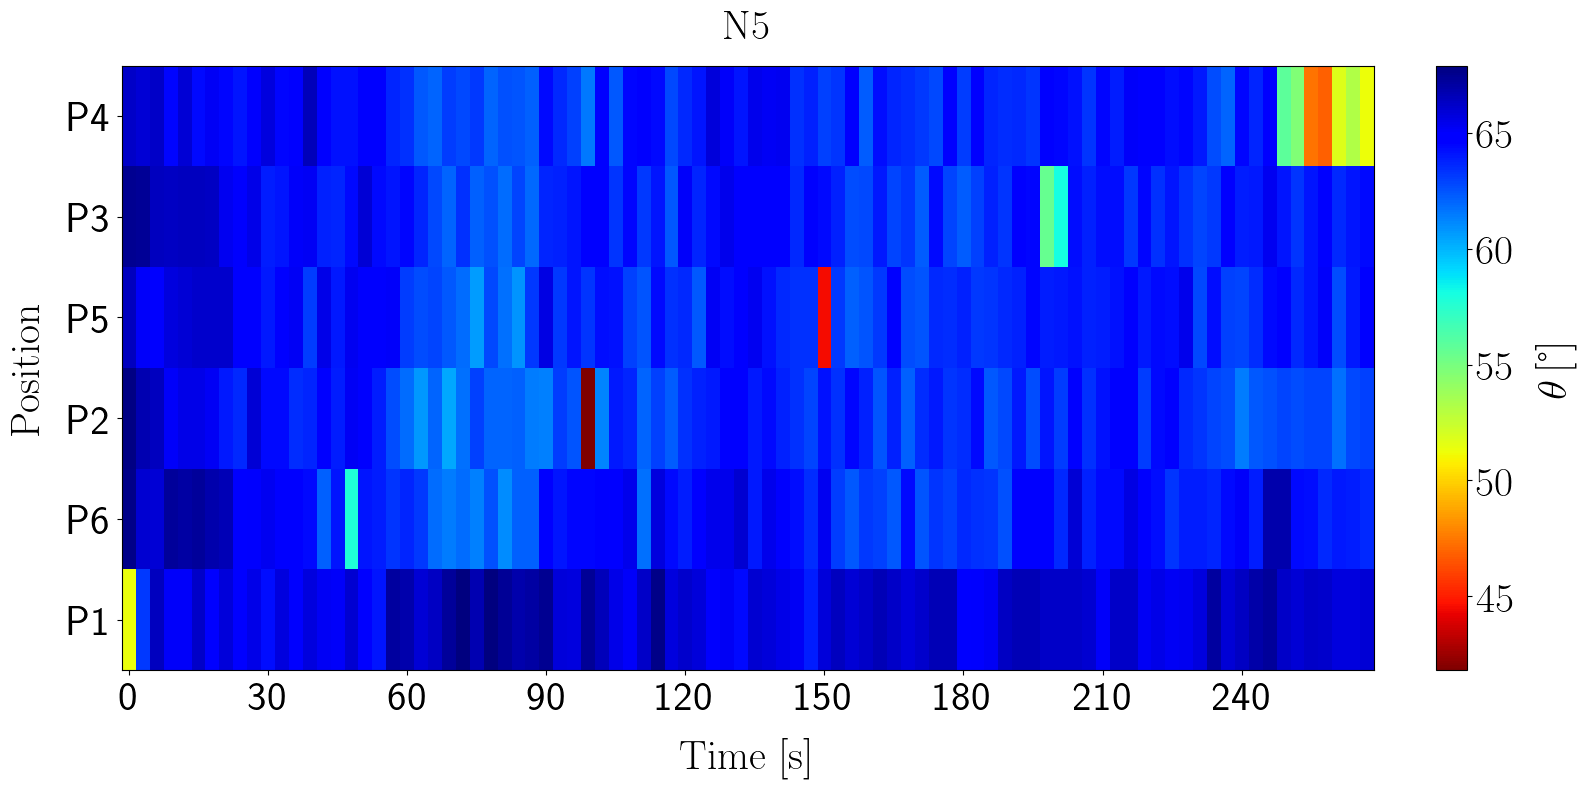

In [30]:
# Build matrix containing the localization results
ordered_pos, ordered_records = re_order_recordings(list(dict_loc_static.keys()))
q = [dict_loc_static[key]["d"] for key in ordered_records]
loc_mat = np.stack(q, axis=0)
x_th = [dict_th_pos[key] for key in ordered_pos]
t_th = np.array(list(x_th)) / src_speed / time_step
t = np.arange(0, loc_mat.shape[1]) * processing_props["time_step"]

plt.figure()
plt.imshow(loc_mat, aspect="auto", cmap="jet_r")
plt.colorbar(
    label=r"$\theta \, \textrm{[°]}$"
)  # = \frac{\theta_{max} - \theta}{\theta_{max} - \theta_{min}}
# plt.scatter(t_th, np.arange(len(t_th)), c="r", s=250, marker="x")
plt.gca().invert_yaxis()  # Reverse the y axis
plt.xticks(np.arange(0, loc_mat.shape[1], 10), np.round(t[::10], 2))
plt.yticks(np.arange(0, loc_mat.shape[0]), ordered_pos)
# plt.pcolormesh(t, p, loc_mat, shading="nearest", cmap="jet")
plt.xlabel(r"$\textrm{Time [s]}$")
plt.ylabel(r"$\textrm{Position}$")
plt.title(r"$\textrm{" + f"{ordered_records[0].split('_')[-3]}" + r"}$")
# Save the figure
plt.savefig(os.path.join(img_path, f"localisation_matrix_{em_lvl_to_loc}_theta.png"))

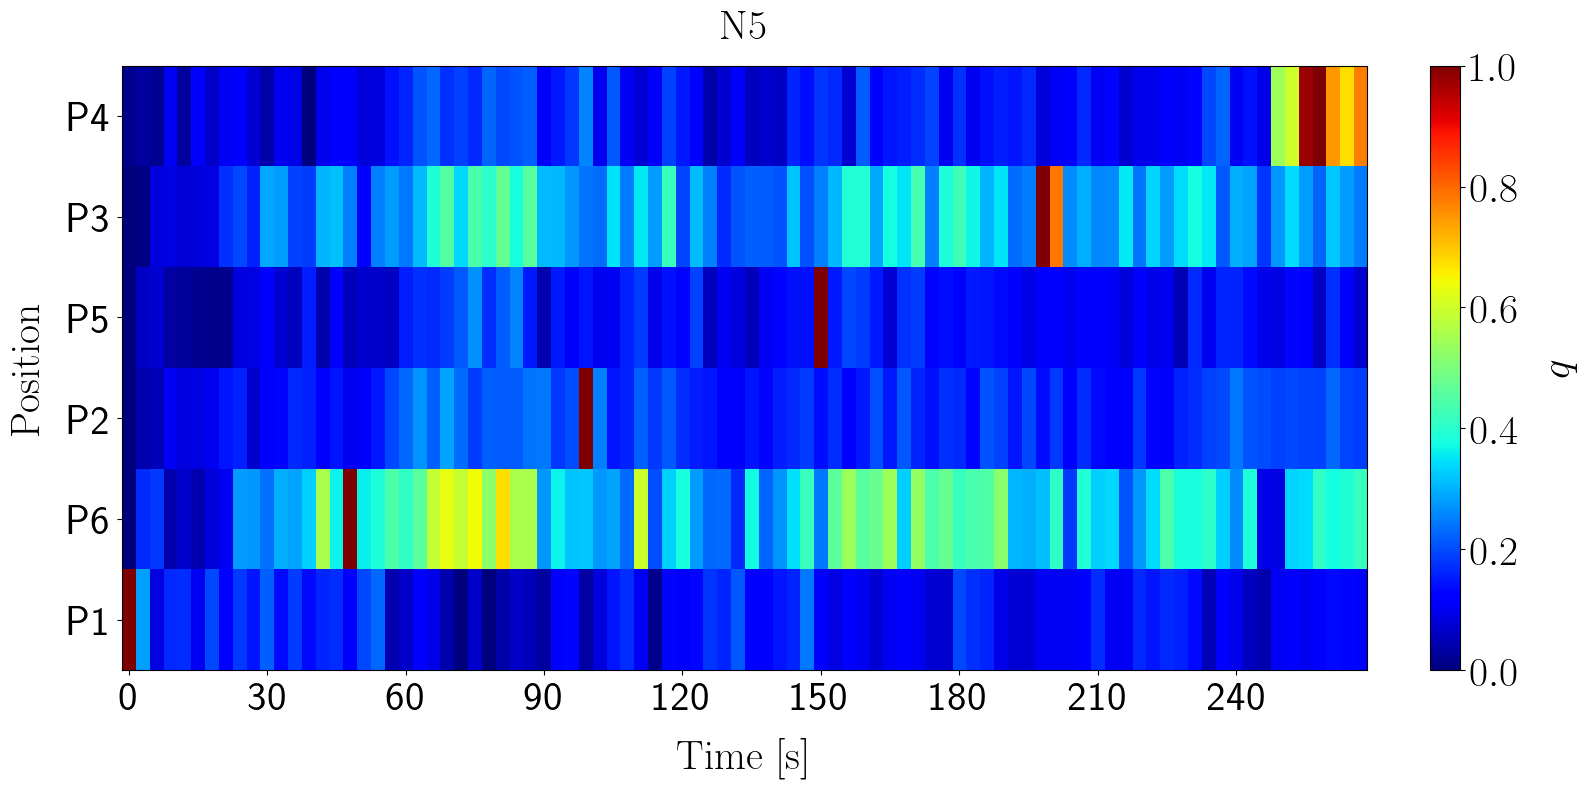

In [31]:
# Build matrix containing the localization results
ordered_pos, ordered_records = re_order_recordings(list(dict_loc_static.keys()))
theta_ordered = [dict_loc_static[key]["d"] for key in ordered_records]
q = np.empty_like(theta_ordered)
for i in range(len(q)):
    q[i] = (np.max(theta_ordered[i]) - theta_ordered[i]) / (
        np.max(theta_ordered[i]) - np.min(theta_ordered[i])
    )
    # q[i] = (np.median(q[i]) - q[i]) / (np.median(q[i]) - np.min(q[i]))


loc_mat = np.stack(q, axis=0)
# loc_mat = (np.max(loc_mat) - loc_mat) / (np.max(loc_mat) - np.min(loc_mat))
# loc_mat = np.stack([dict_loc[key]["d"] for key in ordered_records], axis=0)
# Time vector
t = np.arange(0, loc_mat.shape[1]) * processing_props["time_step"]
p = list(dict_th_pos.keys())

x_th = [dict_th_pos[key] for key in ordered_pos]
t_th = np.array(list(x_th)) / src_speed / time_step

plt.figure()
plt.imshow(loc_mat, aspect="auto", cmap="jet")
plt.colorbar(
    label=r"$q$"
)  # = \frac{\theta_{max} - \theta}{\theta_{max} - \theta_{min}}
# plt.scatter(t_th, np.arange(len(t_th)), c="r", s=250, marker="x")
plt.gca().invert_yaxis()  # Reverse the y axis
plt.xticks(np.arange(0, loc_mat.shape[1], 10), np.round(t[::10], 2))
plt.yticks(np.arange(0, loc_mat.shape[0]), ordered_pos)
# plt.pcolormesh(t, p, loc_mat, shading="nearest", cmap="jet")
plt.xlabel(r"$\textrm{Time [s]}$")
plt.ylabel(r"$\textrm{Position}$")
plt.title(r"$\textrm{" + f"{em_lvl_to_loc}" + r"}$")
# Save the figure
plt.savefig(os.path.join(img_path, f"localisation_matrix_{em_lvl_to_loc}_q.png"))

### Build localisation probability 

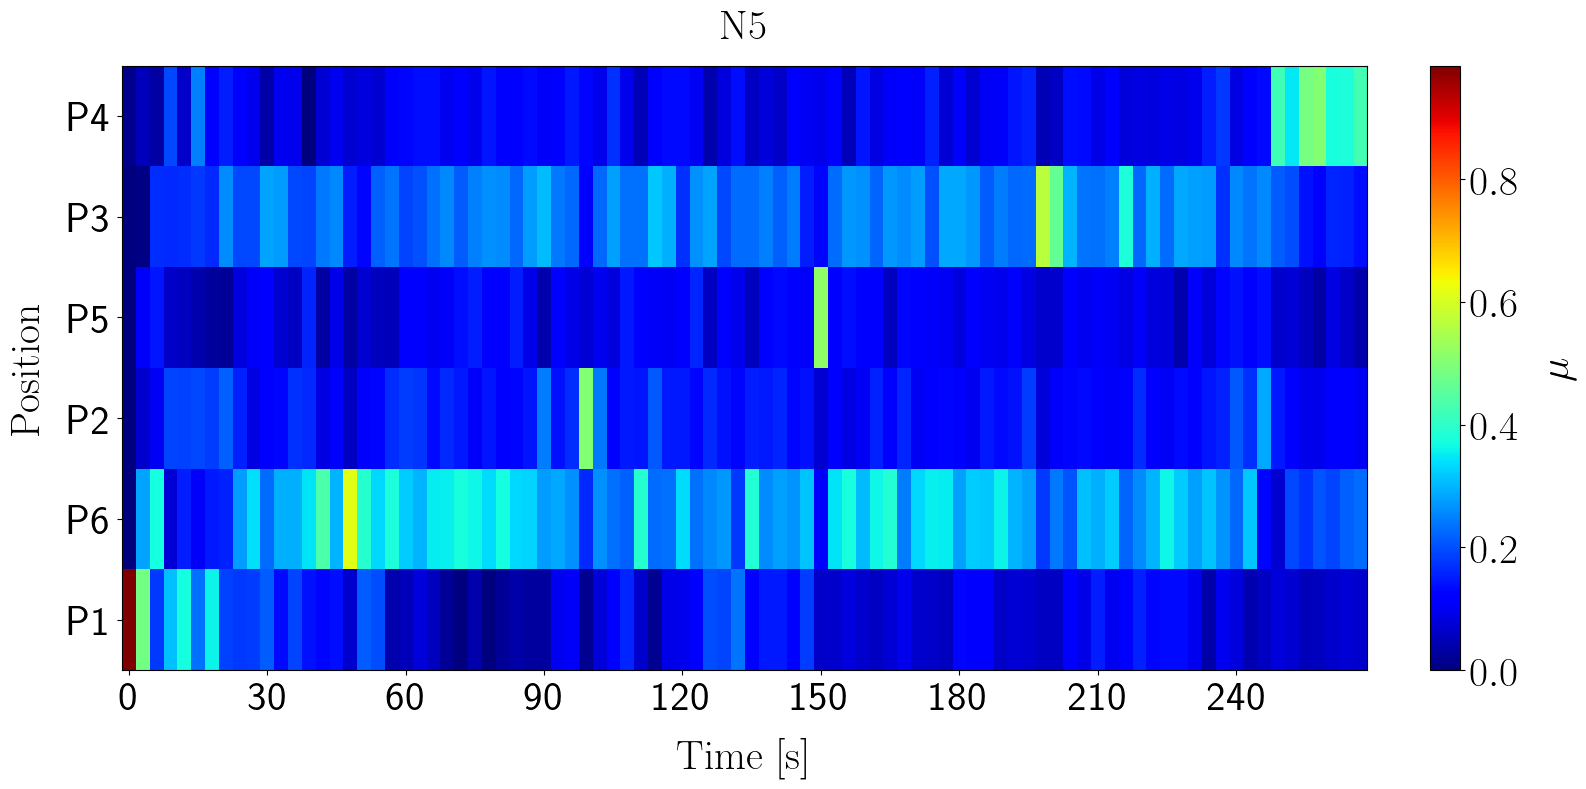

In [32]:
q_arr = np.array(q)
mu = q_arr / np.sum(q_arr, axis=0)

loc_mat = np.stack(mu, axis=0)
# Time vector
t = np.arange(0, loc_mat.shape[1]) * processing_props["time_step"]
p = list(dict_th_pos.keys())

x_th = [dict_th_pos[key] for key in ordered_pos]
t_th = np.array(list(x_th)) / src_speed / time_step

plt.figure()
plt.imshow(loc_mat, aspect="auto", cmap="jet")
plt.colorbar(
    label=r"$\mu$"
)  # = \frac{\theta_{max} - \theta}{\theta_{max} - \theta_{min}}
plt.gca().invert_yaxis()  # Reverse the y axis
plt.xticks(np.arange(0, loc_mat.shape[1], 10), np.round(t[::10], 2))
plt.yticks(np.arange(0, loc_mat.shape[0]), ordered_pos)
plt.xlabel(r"$\textrm{Time [s]}$")
plt.ylabel(r"$\textrm{Position}$")
plt.title(r"$\textrm{" + f"{em_lvl_to_loc}" + r"}$")
plt.savefig(os.path.join(img_path, f"localisation_matrix_{em_lvl_to_loc}_mu.png"))

In [33]:
time_step

3

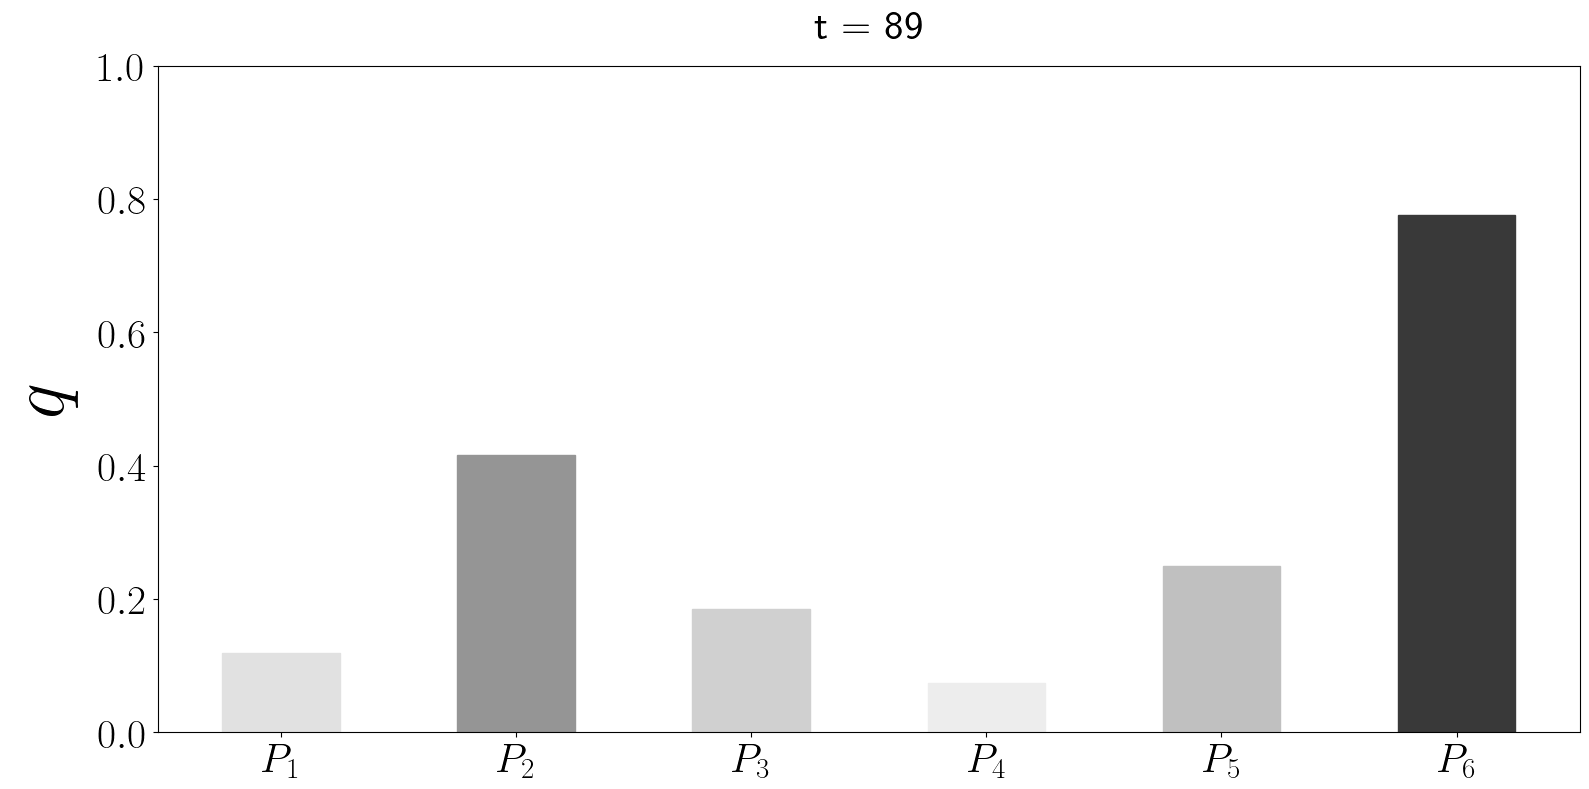

In [34]:
pubfig = PubFigure(label_fontsize=55)

# Paramètres du graphe
speed_factor = 15
fig, ax = plt.subplots()
# x_labels = ["P1", "P2", "P3", "P4", "P5", "P6"]
# x_labels = [f"${ordered_pos[i][0]}_{ordered_pos[i][1]}$" for i in range(len(ordered_pos))]
x_labels = [f"$P_{i+1}$" for i in range(len(ordered_pos))]

bar_width = 0.5
bars = ax.bar(x_labels, mu[:, 0], width=bar_width, color=plt.cm.hot(mu[:, 0]))

ax.set_ylim(0, 1)
ax.set_ylabel(r"$q$")
# ax.set_title("Évolution des probabilités au cours du temps")

nt = mu.shape[1]
# Mise à jour du graphe à chaque frame
def update(frame):
    heights = q[:, frame]
    for i, bar in enumerate(bars):
        bar.set_height(heights[i])
        # bar.set_color(plt.cm.jet(heights[i]))  # Mise à jour de la couleur
        bar.set_color(plt.cm.binary(heights[i]))  # Mise à jour de la couleur

    ax.set_title(f"t = {frame}")

# # Animation
ani = FuncAnimation(fig, update, frames=nt, interval=100)

# writer = FFMpegWriter(fps=10, metadata=dict(artist="Baptiste"), bitrate=1800)
# ani.save("evolution_probabilites.mp4", writer=writer)

# Sauvegarde de l'animation en GIF
fps_video = 24
nf_video = 408
t_video = nf_video / fps_video
fps = nt / t_video
writer = PillowWriter(fps=fps)

# writer = PillowWriter(fps=1/time_step*speed_factor)
ani.save("evolution_probabilites.gif", writer=writer)

plt.show()

### Animation du dispositif expérimental 

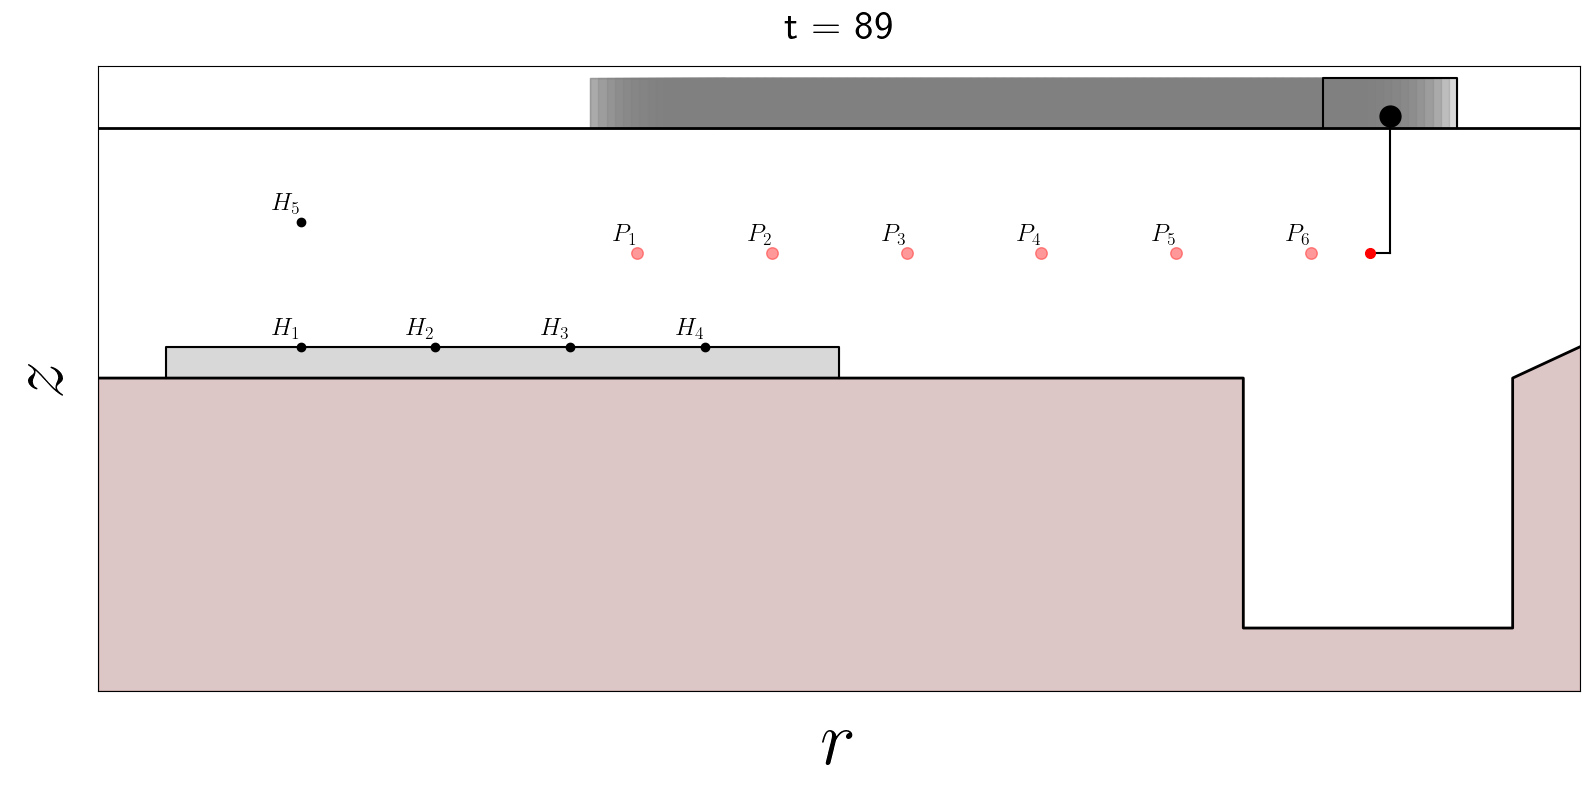

In [35]:
# Initialisation de la figure
nframes = nt
# nframes = 10
fig, ax = plt.subplots()
ax.set_xlim(0, 11)
ax.set_ylim(-5, 5)
ax.set_xlabel(r"$r$")
ax.set_ylabel(r"$z$")

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

# Dessin des interfaces surface et fond
ax.plot([0, 11], [4, 4], color="black", linewidth=2)  # Surface
ax.plot(
    [0, 8.5, 8.5, 10.5, 10.5, 11], [0, 0, -4, -4, 0, 0.5], color="black", linewidth=2
)  # Fond

# Coloration du fond
ax.fill_between(
    [0, 8.5, 8.5, 10.5, 10.5, 11], -5, [0, 0, -4, -4, 0, 0.5], color="rosybrown", alpha=0.5
)

# Dessin de la poutre (rectangle gris)
ax.fill_between([0.5, 5.5], 0, 0.49, color="gray", alpha=0.3)
ax.plot([0.5, 0.5, 5.5, 5.5], [0, 0.49, 0.49, 0], color="black")

# Positions des hydrophones H1 à H4 (sur la poutre)
h_pos = [1.5, 2.5, 3.5, 4.5]
for i, x in enumerate(h_pos):
    ax.plot(x, 0.5, "ko")
    ax.text(x, 0.7, f"$H_{{{i+1}}}$", ha="right", fontsize=18)

# Hydrophone H5 (au-dessus de la poutre)
ax.plot(1.5, 2.5, "ko")
ax.text(1.5, 2.7, "$H_{5}$", ha="right", fontsize=18)

# Positions initiales des sources P1 à P6
p_r = np.array([4, 5, 6, 7, 8, 9])
p_z = np.full_like(p_r, 2.5)
ax.scatter(p_r, p_z, color="r", s=70, alpha=0.4)  # Positions fixes des sources

# Légendes des positions P1 à P6
for i, (x, y) in enumerate(zip(p_r, p_z)):
    # ax.text(x, y + 0.2, f"${ordered_pos[i][0]}_{ordered_pos[i][1]}$", ha="right", fontsize=18)
    ax.text(x, y + 0.2, f"$P_{i+1}$", ha="right", fontsize=18)


# Dessin de la plateforme mobile (rectangle gris)
platform_r = [3.65, 4.65]
platform_z = [4, 4.8]
# Plateforme
platform = ax.plot(
    [platform_r[0], platform_r[0], platform_r[1], platform_r[1]],
    [platform_z[0], platform_z[1], platform_z[1], platform_z[0]],
    color="black", 
    )[0]
ax.fill_between(
    [platform_r[0], platform_r[1]],
    [platform_z[0], platform_z[0]], [platform_z[1], platform_z[1]],
    color="gray",
    alpha=0.3,
)


# Roue
wheal_r = platform_r[0] + 0.5
wheal_z = platform_z[0] + 0.2
platform_wheal = ax.plot(
    wheal_r,
    wheal_z,
    "ko",
    markersize=15,
)[
    0
]  # facecolors=None, edgecolors="k", s=200

# Support source
source_vline = ax.plot([platform_r[0] + 0.5, platform_r[0] + 0.5], [p_z[0], 4], "k")[0]
source_hline = ax.plot([p_r[0], platform_r[0] + 0.5], [p_z[0], p_z[0]], "k")[0]

# Cercle mobile représentant la source active
source_active = ax.plot(p_r[0], p_z[0], "ro", markersize=7)[0]


src_dx = (p_r[-1] - p_r[0] + 0.5) / nframes 
# Fonction de mise à jour de l'animation
def update(frame):
    # Update de la position de la source
    new_x = platform_r[0] + src_dx * frame
    new_x_src = p_r[0] + src_dx * frame
    source_vline.set_xdata([new_x+0.5, new_x+0.5])  # Deux points pour la ligne verticale
    source_hline.set_xdata([new_x_src, new_x + 0.5])  # Deux points pour la ligne horizontale
    source_active.set_xdata([new_x_src])  # Source

    # Update de la position de la plateforme
    platform.set_xdata([new_x, new_x, new_x + 1, new_x + 1])
    ax.fill_between(
        [new_x, new_x + 1],
        [platform_z[0], platform_z[0]],
        [platform_z[1], platform_z[1]],
        color="gray",
        alpha=0.3,
    )

    platform_wheal.set_xdata([wheal_r + src_dx * frame])

    ax.set_title(f"t = {frame}")


# Animation (déplacement de la source)
ani = FuncAnimation(fig, update, frames=nframes, interval=100)

# Sauvegarde de l'animation en GIF
# writer = PillowWriter(fps=1 / time_step * speed_factor)
fps_video = 24
nf_video = 408
t_video = nf_video / fps_video
fps = nt / t_video
writer = PillowWriter(fps=fps)

ani.save("schema_plateforme_dynamique.gif", writer=writer)

plt.show()

### Estimate velocity

C:\Users\baptiste.menetrier\AppData\Local\Temp\ipykernel_18728\883552551.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  slop, intercept = np.linalg.lstsq(A, x_max)[0]


Estimated velocity : 0.098 m/s


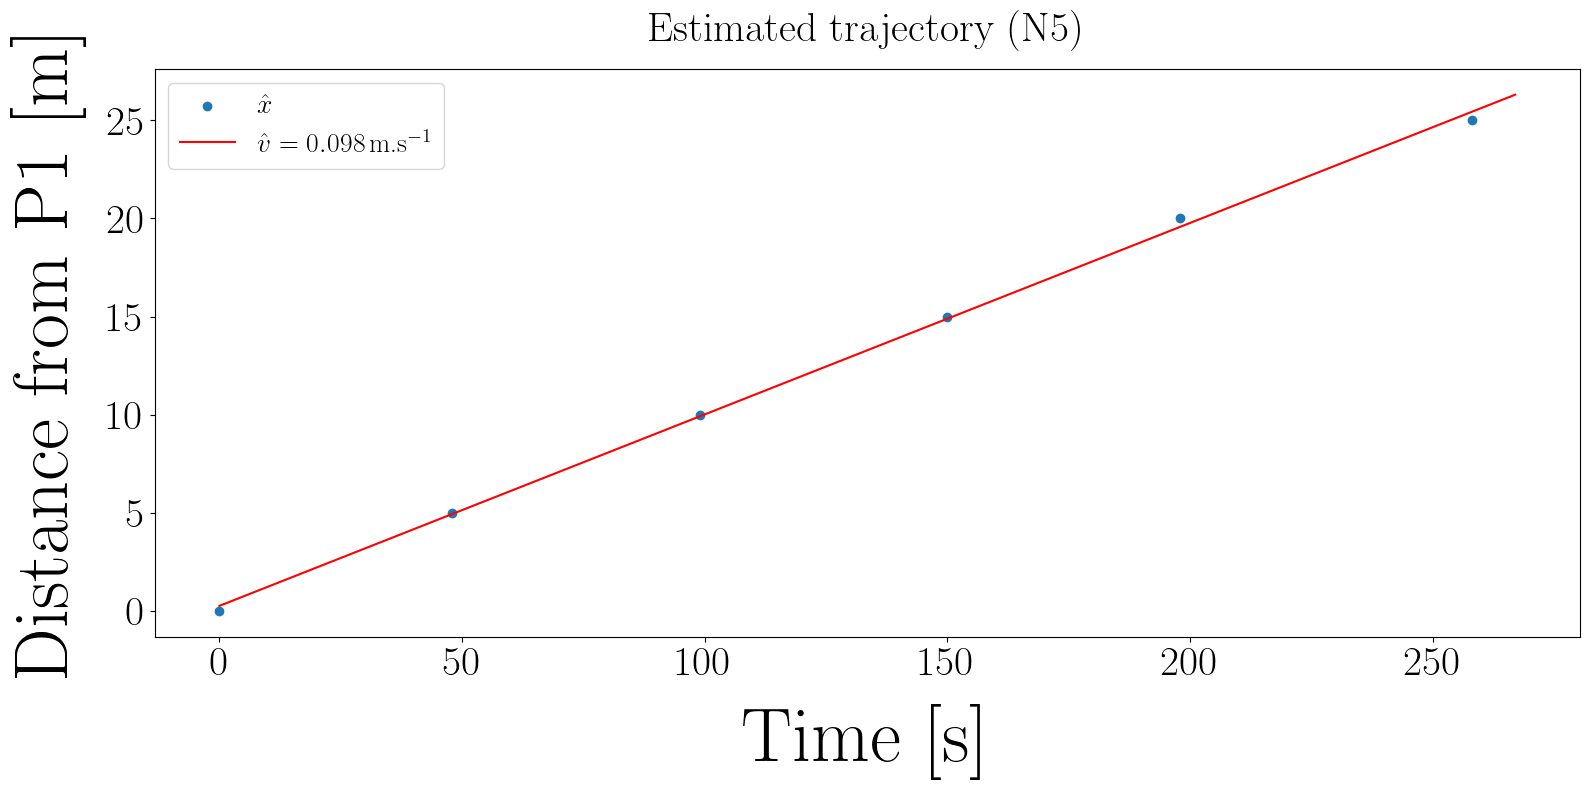

In [36]:
# Get max value of the matrix along the time axis
max_val = np.argmax(loc_mat, axis=1)
# Get the corresponding time
t_max = t[max_val]
# Get the corresponding position
x_max = np.array(
    [dict_th_pos[ordered_pos[i]] for i in range(len(ordered_pos))]
)

# Linear regression to estimate the velocity of the source
A = np.vstack([t_max, np.ones(len(t_max))]).T
slop, intercept = np.linalg.lstsq(A, x_max)[0]
print(f"Estimated velocity : {np.round(slop, 3)} m/s")

plt.figure()
plt.scatter(t_max, x_max, label=r"$\hat{x}$")
plt.plot(
    t,
    slop * t + intercept,
    "r",
    label=r"$\hat{v} = " + f"{np.round(slop, 3)}" + r"\, \textrm{m.s}^{-1}$",
)
plt.legend()
plt.xlabel(r"$\textrm{Time [s]}$")
plt.ylabel(r"$\textrm{Distance from P1 [m]}$")
plt.title(r"$\textrm{Estimated trajectory" + f" ({em_lvl_to_loc})" + r"}$")
plt.savefig(os.path.join(img_path, f"estimated_trajectory_{em_lvl_to_loc}.png"))

## Loc map with dynamic recording localising itself 

c:\Users\baptiste.menetrier\.virtualenvs\phd-FBjz4hBd\Lib\site-packages\xarray\namedarray\core.py:264: UserWarning: Duplicate dimension names present: dimensions {'h_index'} appear more than once in dims=('f_csdm', 'h_index', 'h_index'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  self._dims = self._parse_dimensions(dims)
c:\Users\baptiste.menetrier\.virtualenvs\phd-FBjz4hBd\Lib\site-packages\xarray\namedarray\core.py:264: UserWarning: Duplicate dimension names present: dimensions {'h_index'} appear more than once in dims=('f_csdm', 'h_index', 'h_index'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you renam

ValueError: too many values to unpack (expected 3)

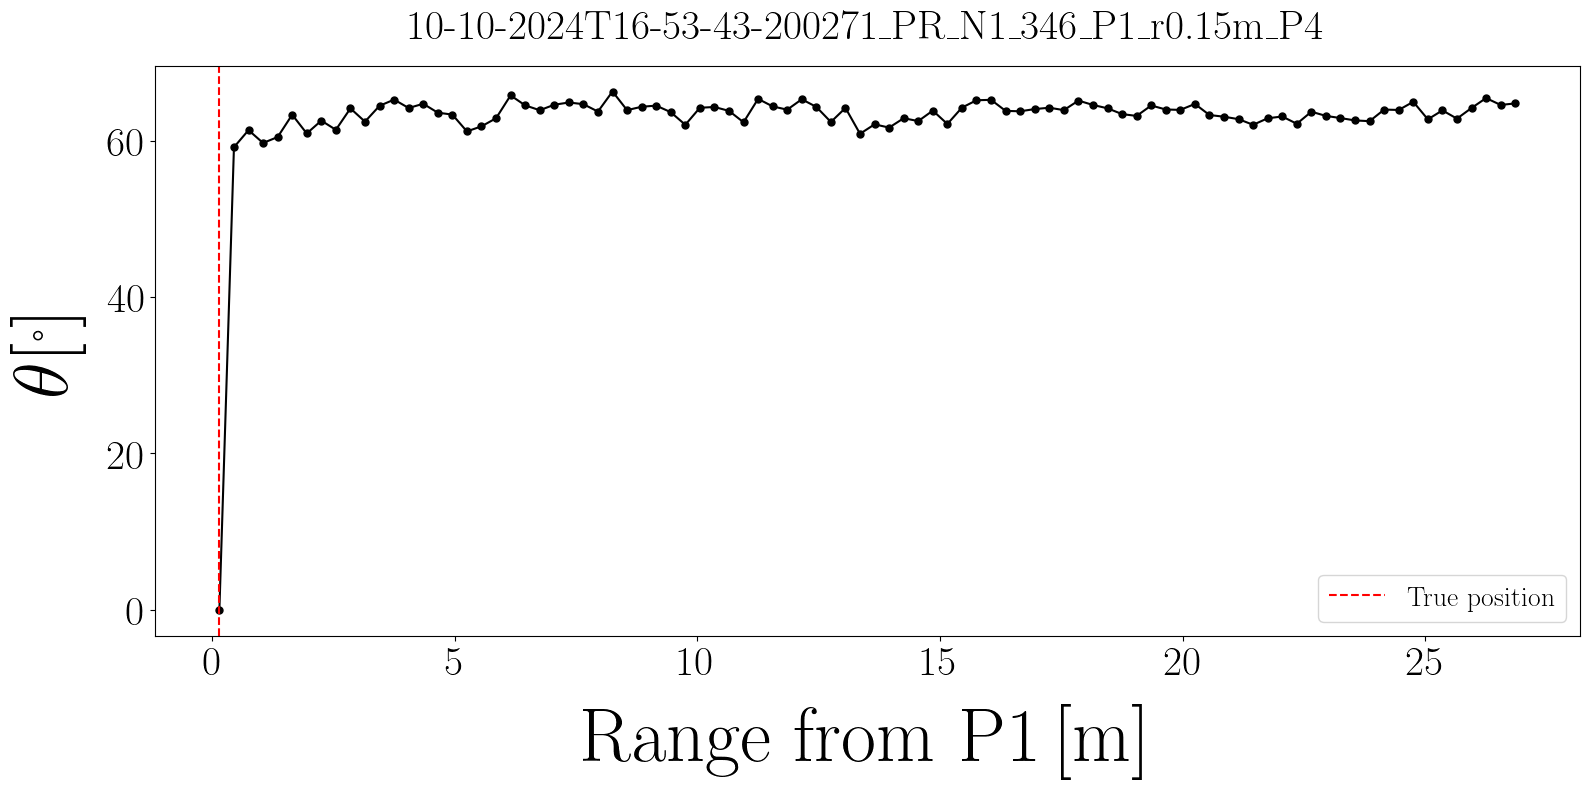

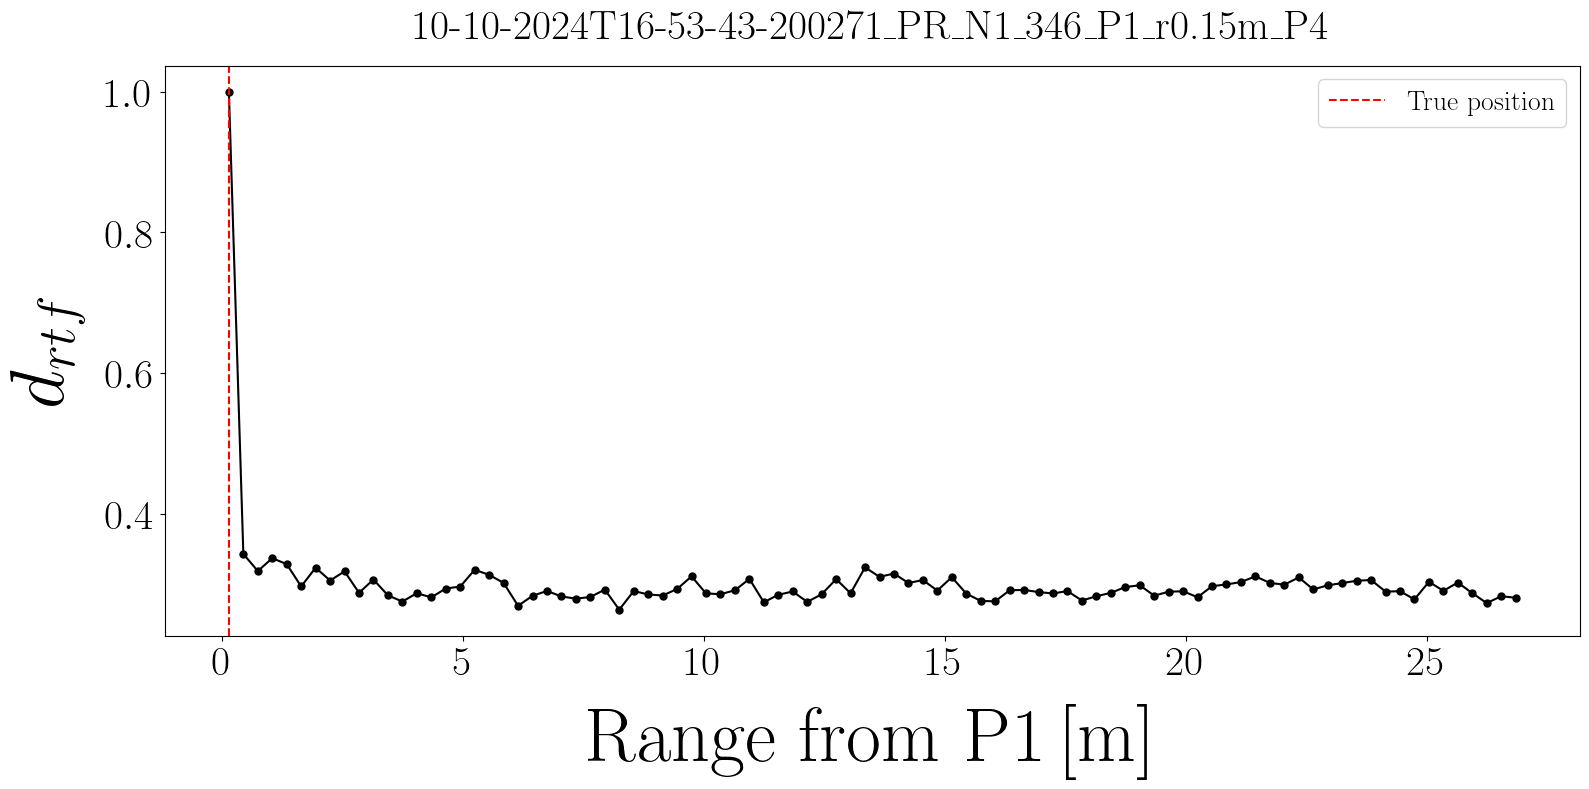

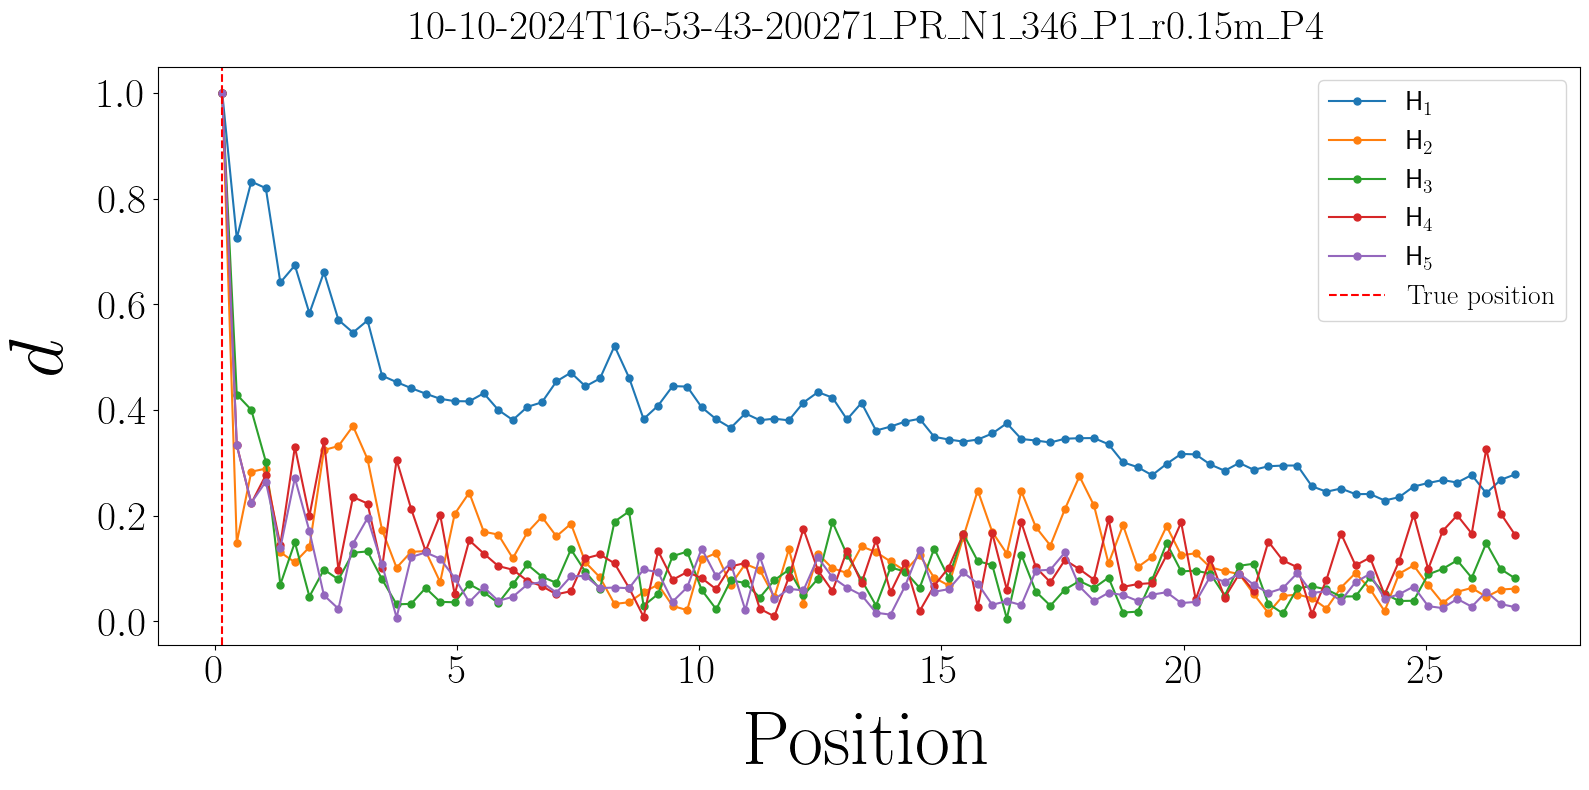

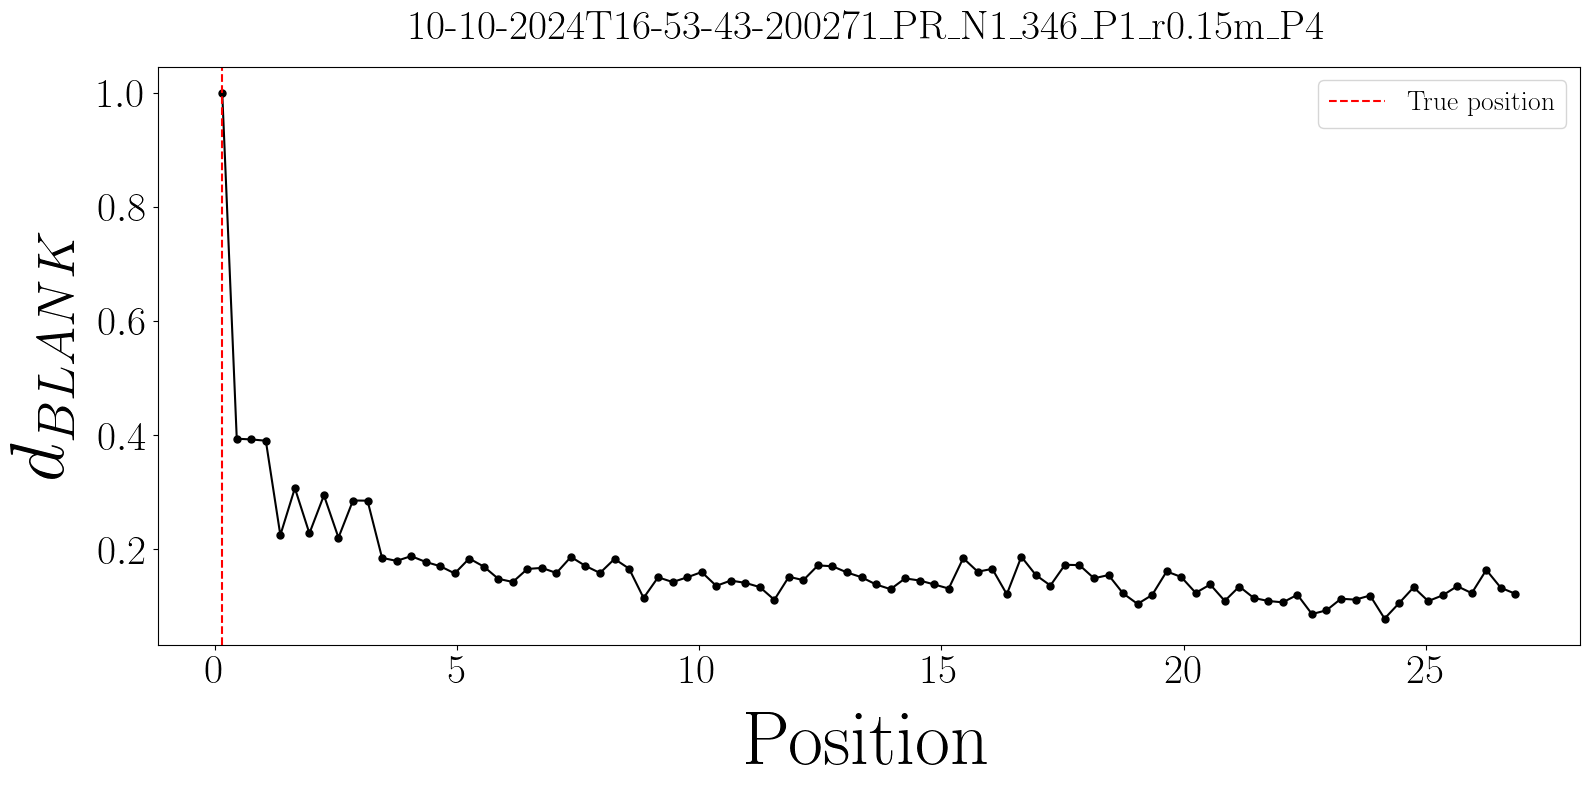

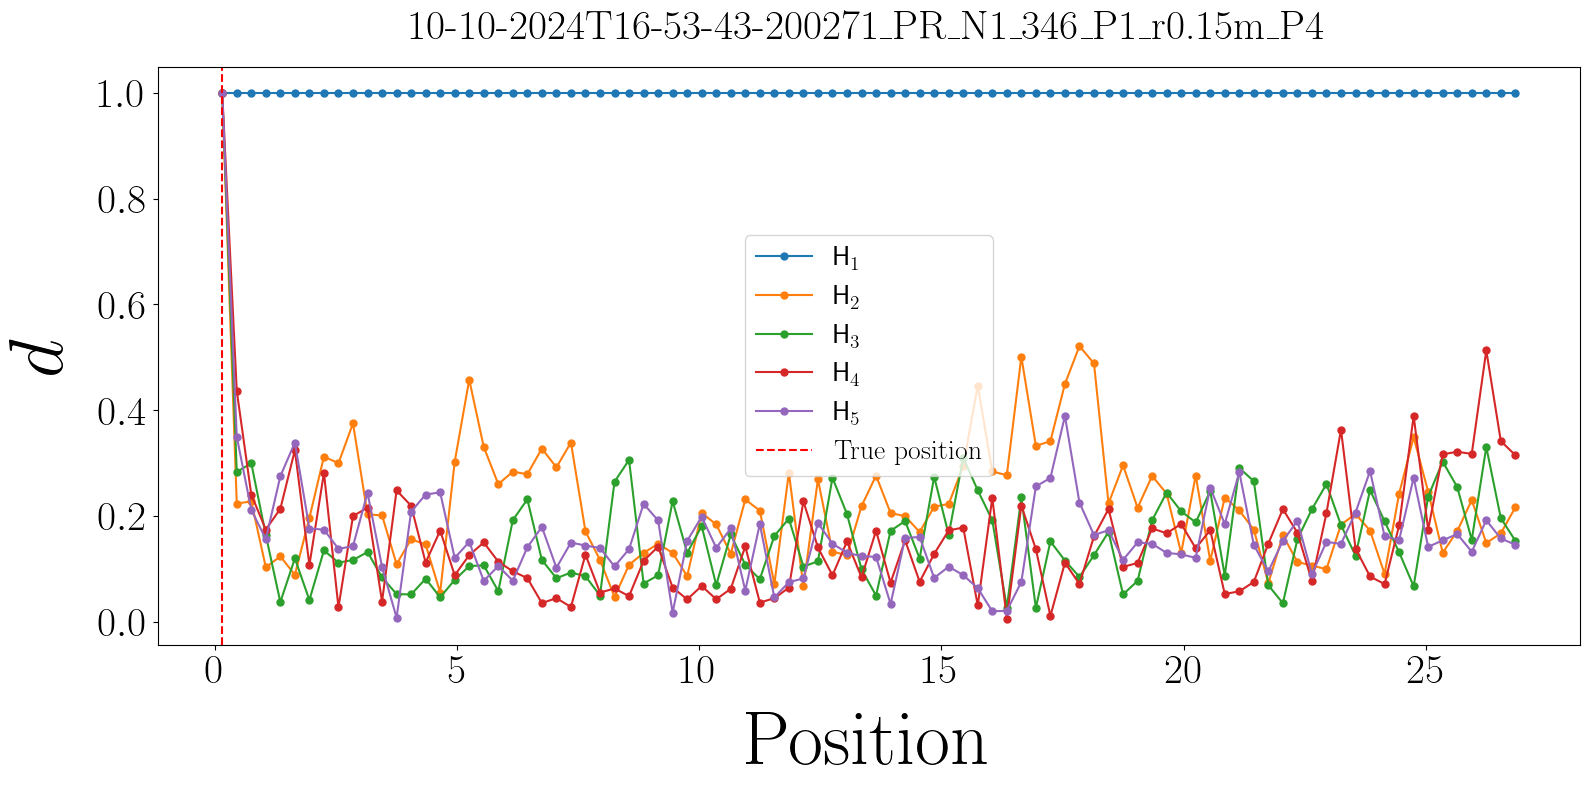

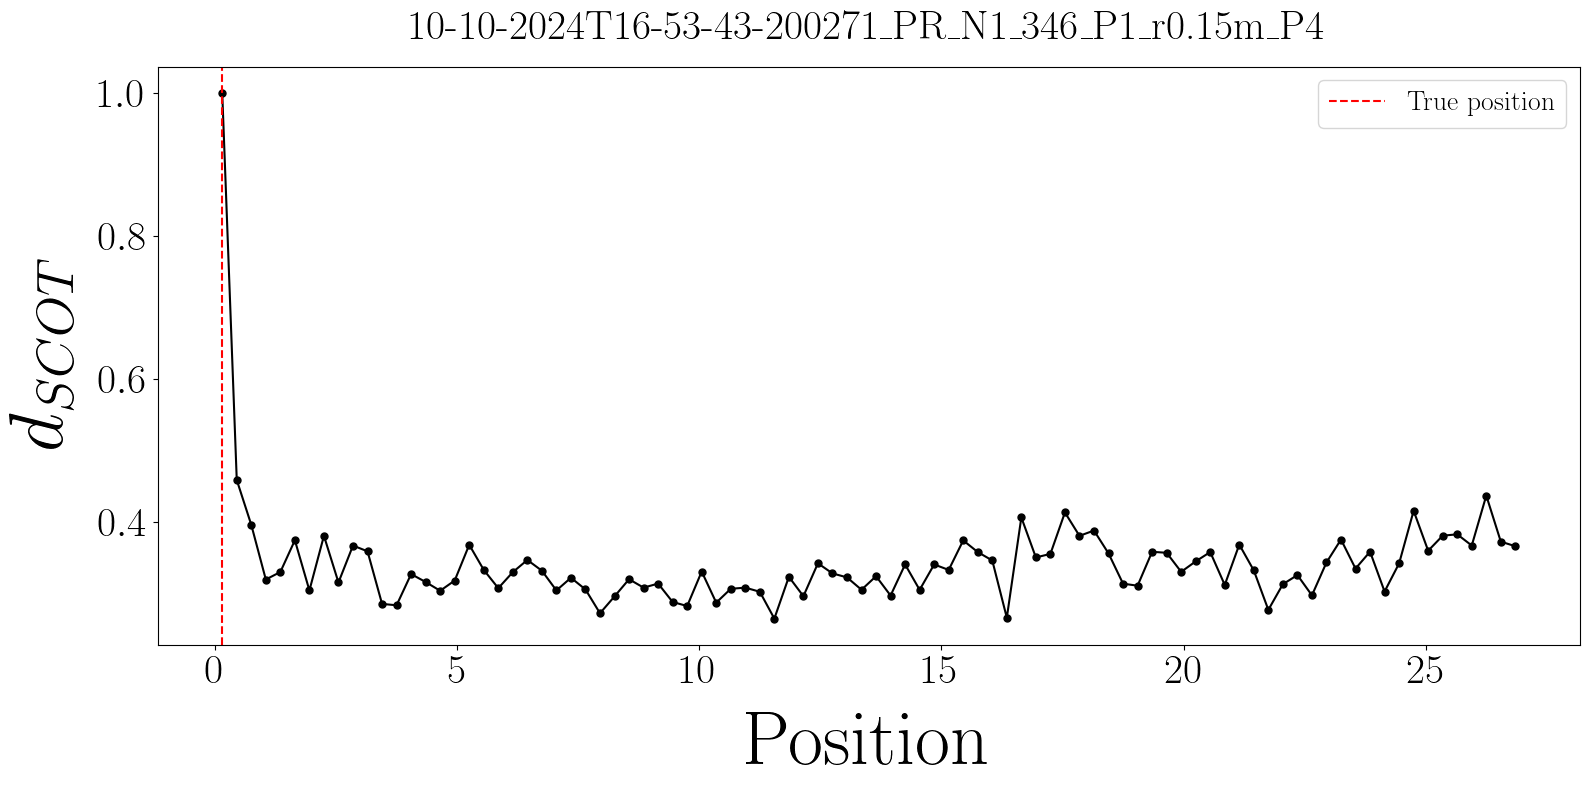

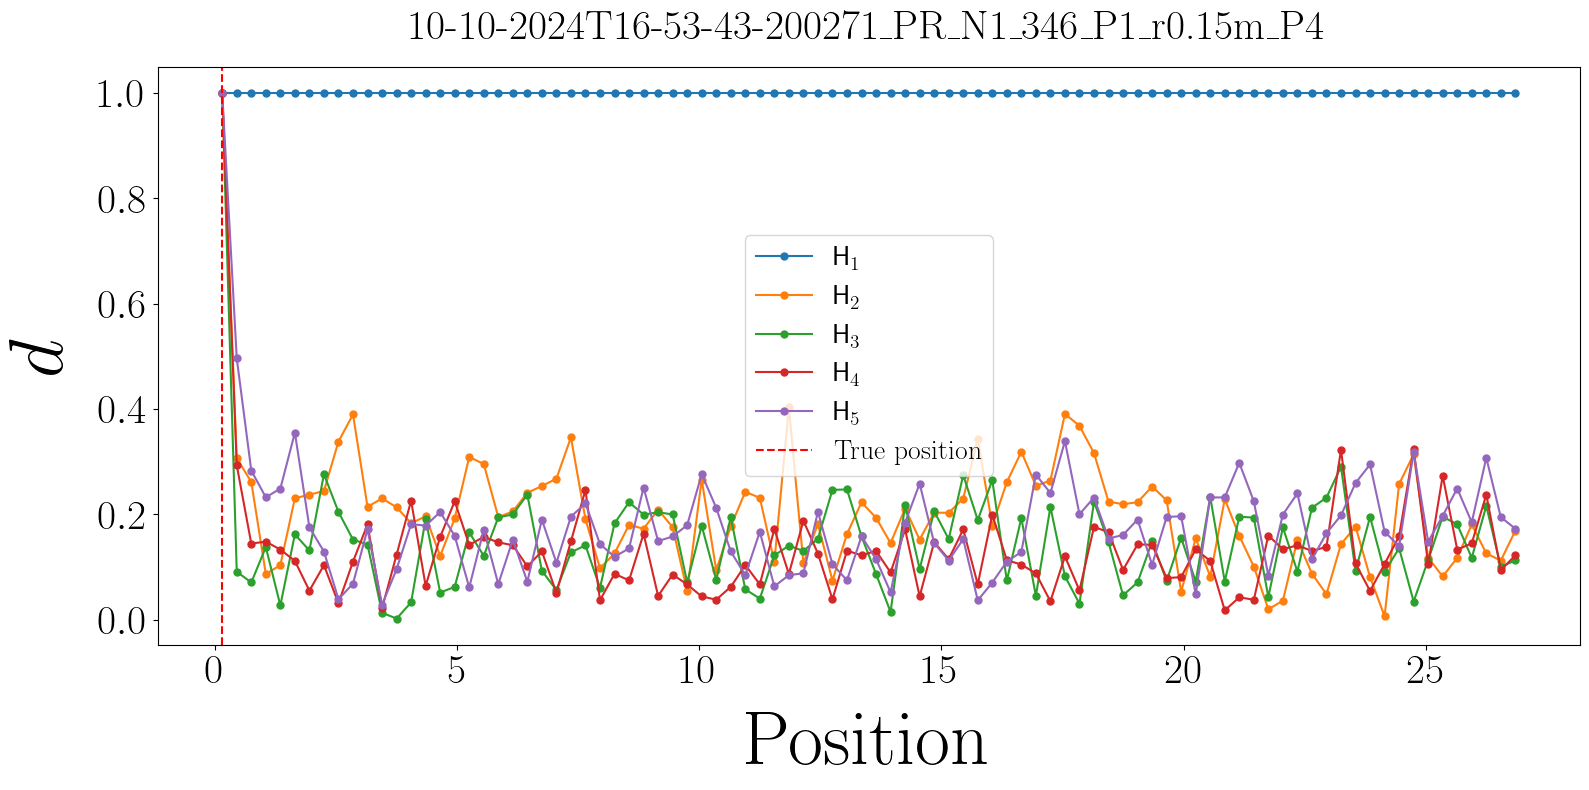

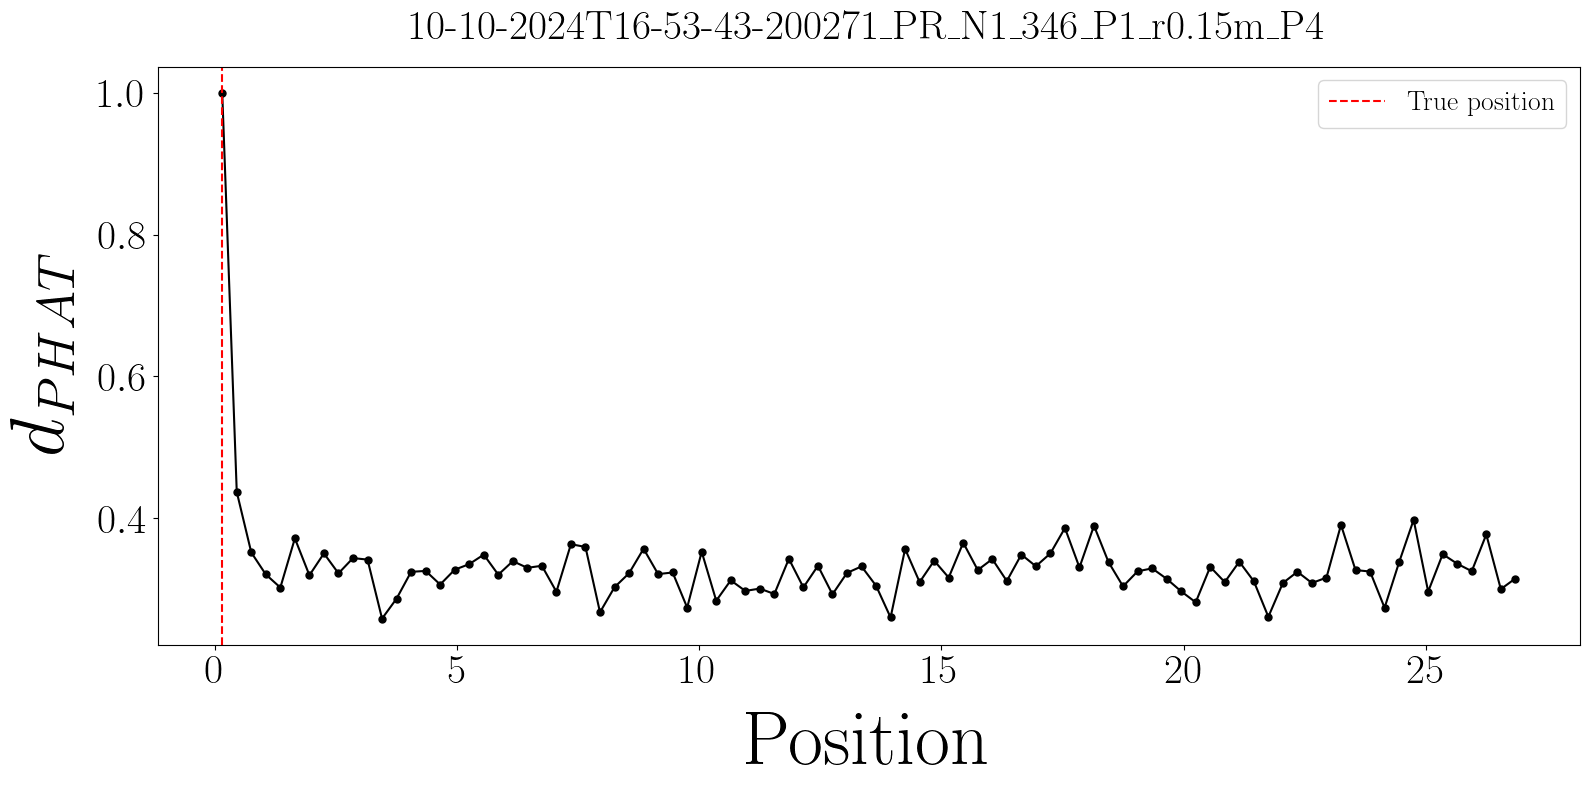

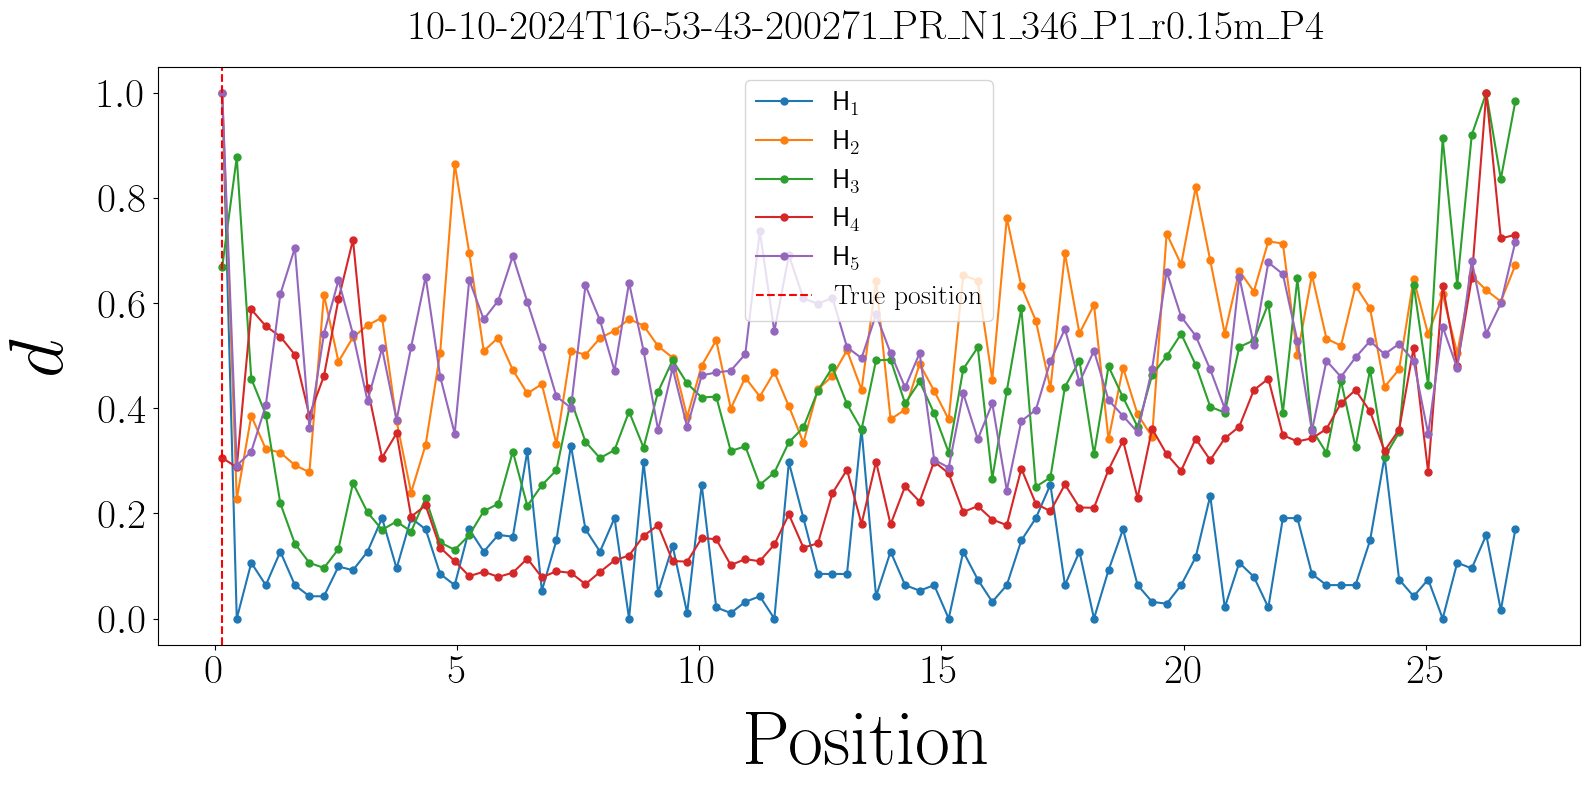

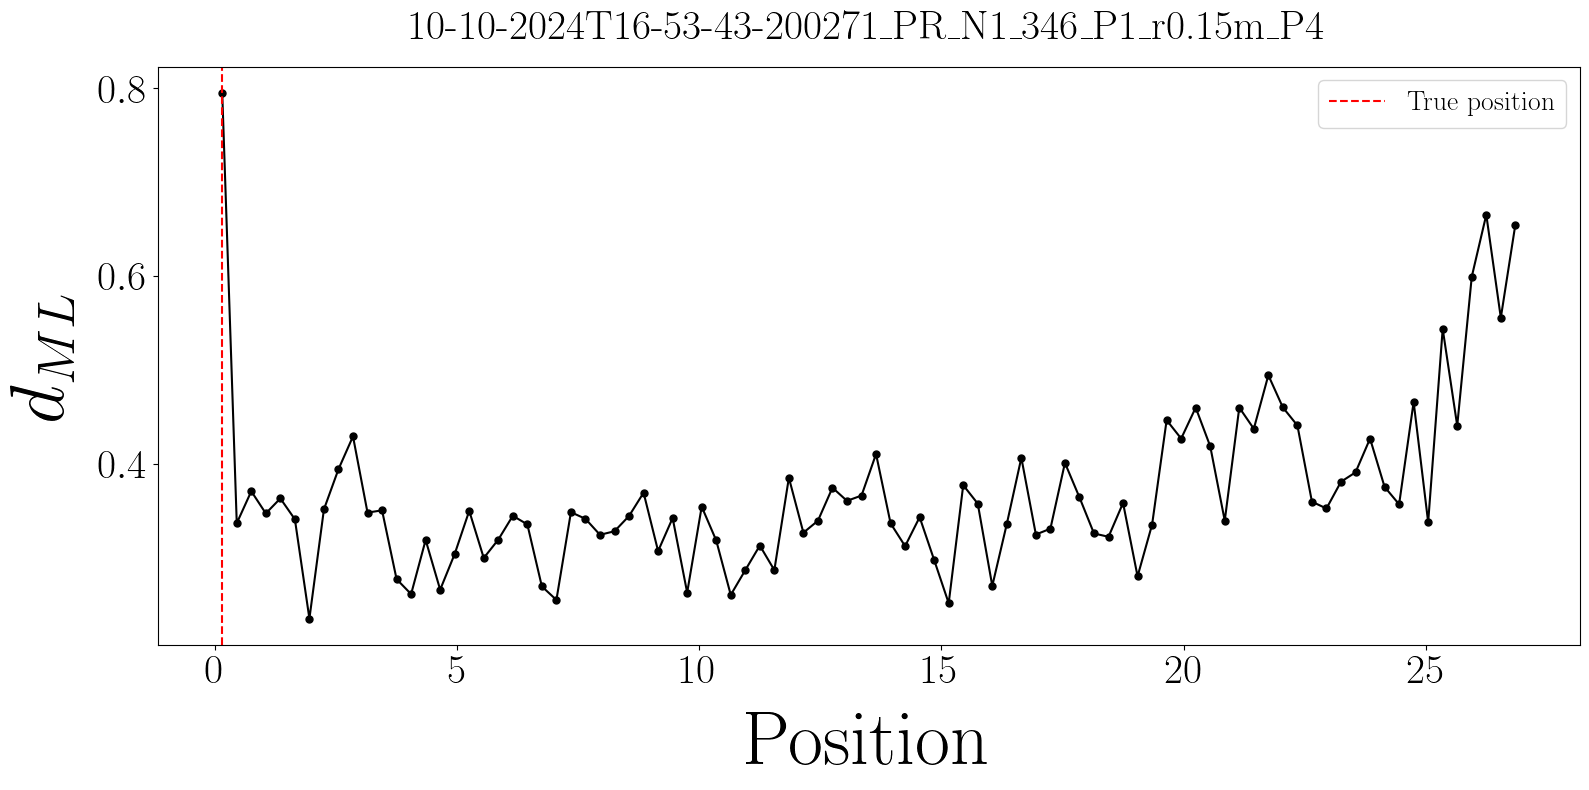

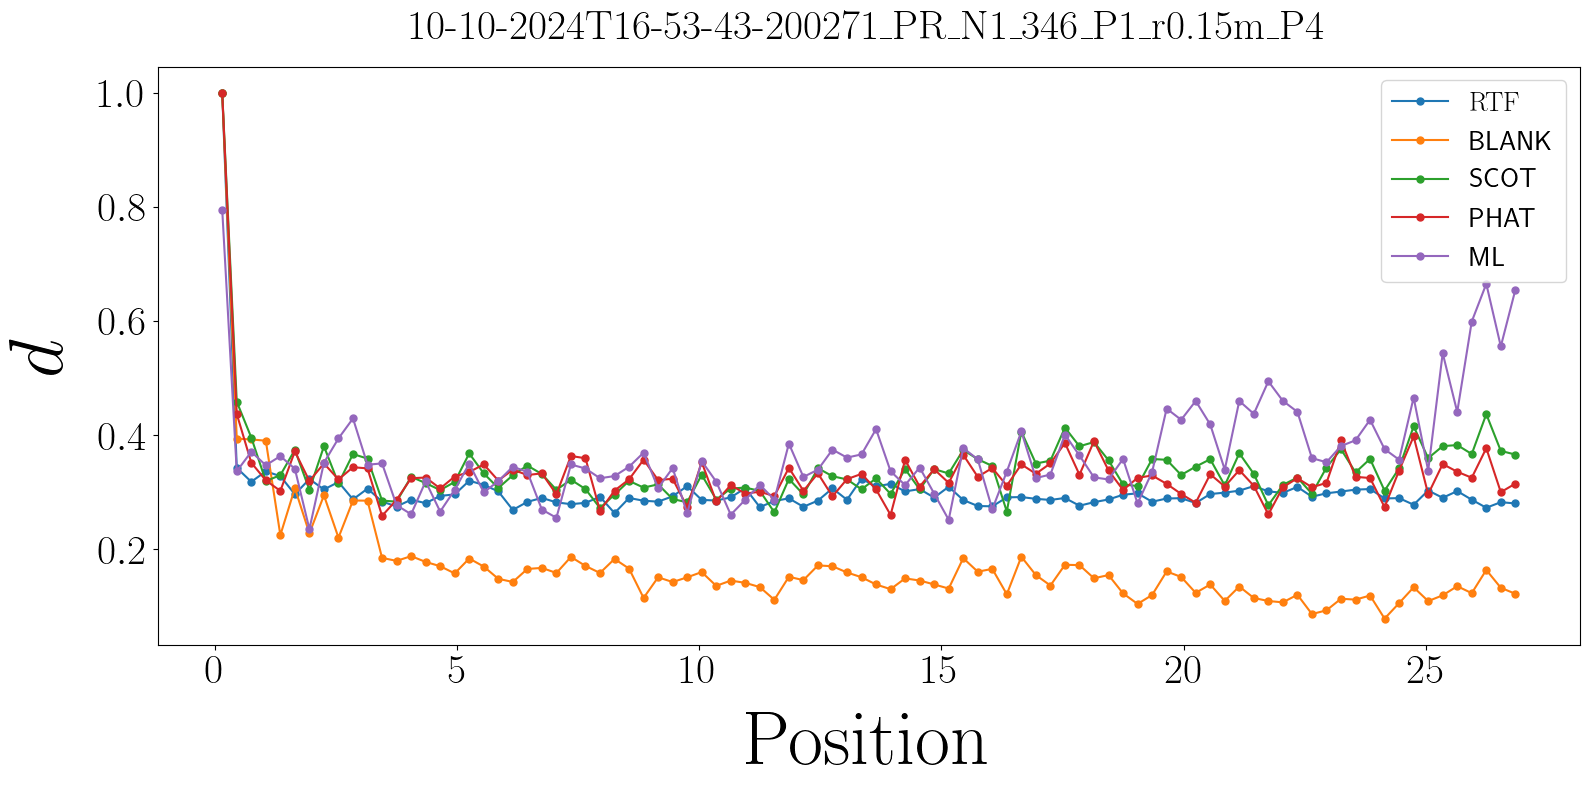

In [37]:
records_to_loc = recording_names_dynamic
dict_loc_dyn = {}

for recording_name_to_loc in records_to_loc:

    # # Localizing static records
    # pos_id = recording_name_to_loc.split("_")[1]
    # th_pos = dict_th_pos[pos_id]

    # Localizing section from dynamic record
    th_pos = float(recording_name_to_loc.split("_")[-2][1:-1])

    range_from_p1, dist, _ = localise(
        recording_names=recording_names_dynamic,
        recording_name_to_loc=recording_name_to_loc,
        recording_props=recording_props,
        processing_props=processing_props,
        th_pos=th_pos,
    )
    r_hat = range_from_p1[np.argmin(dist)]
    dict_loc_dyn[recording_name_to_loc] = {
        "d": dist,
        "r": range_from_p1,
        "r_th": th_pos,
        "r_hat": r_hat,
    }
# plt.close("all")

In [ ]:
# Build matrix containing the localization results
# ordered_pos, ordered_records = re_order_recordings(list(dict_loc.keys()))
# q = [dict_loc[key]["d"] for key in ordered_records]
q = [dict_loc_dyn[key]["d"] for key in list(dict_loc_dyn.keys())]

for i in range(len(q)):
    q[i] = (np.max(q[i]) - q[i]) / (np.max(q[i]) - np.min(q[i]))
    # q[i] = (np.median(q[i]) - q[i]) / (np.median(q[i]) - np.min(q[i]))


loc_mat = np.stack(q, axis=0)
# loc_mat = (np.max(loc_mat) - loc_mat) / (np.max(loc_mat) - np.min(loc_mat))
# loc_mat = np.stack([dict_loc[key]["d"] for key in ordered_records], axis=0)
# Time vector
t = np.arange(0, loc_mat.shape[1]) * processing_props["time_step"]
p = list(dict_th_pos.keys())

# th_traj =
plt.figure()
plt.imshow(loc_mat, aspect="auto", cmap="jet")
plt.gca().invert_yaxis()  # Reverse the y axis
plt.xticks(np.arange(0, loc_mat.shape[1], 10), np.round(t[::10], 2))
# plt.yticks(np.arange(0, loc_mat.shape[0]), ordered_pos)
# plt.pcolormesh(t, p, loc_mat, shading="nearest", cmap="jet")
plt.colorbar(
    label=r"$q(\theta)$"
)  # = \frac{\theta_{max} - \theta}{\theta_{max} - \theta_{min}}
plt.xlabel(r"$\textrm{Time [s]}$")
plt.ylabel(r"$\textrm{Distance from P1 [m]}$")

### Speed estimation 

In [ ]:
# Get max value of the matrix along the time axis
max_val = np.argmax(loc_mat, axis=1)
# Get the corresponding time
t_max = t[max_val]
# Get the corresponding position
x_max = np.array(
    [float(list(dict_loc_dyn.keys())[i].split("_")[-2][1:-1]) for i in max_val]
)

# Linear regression to estimate the velocity of the source
A = np.vstack([t_max, np.ones(len(t_max))]).T
slop, intercept = np.linalg.lstsq(A, x_max)[0]
print(f"Estimated velocity : {np.round(slop, 3)} m/s")

plt.figure()
plt.scatter(t_max, x_max, label=r"$\hat{x}$")
plt.plot(
    t,
    slop * t + intercept,
    "r",
    label=r"$\hat{v} = " + f"{np.round(slop, 3)}" + r"\, \textrm{m.s}^{-1}$",
)
plt.legend()
plt.xlabel(r"$\textrm{Time [s]}$")
plt.ylabel(r"$\textrm{Distance from P1 [m]}$")
plt.title(r"$\textrm{Estimated trajectory}$")